# Import Libaray

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(mice)
library(tidyverse)
library(repr)
library(infer)
library(gridExtra)
library(caret)
library(pROC)
library(boot)
library(glmnet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ mice::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()   masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice


Attaching packa

# Dataset Overview

This dataset from the National Institute of Diabetes and Digestive and Kidney Diseases predicts diabetes in patients. It contains diagnostic measurements from Pima Indian women aged 21 or older, with 8 input features and one target variable.

## Data Summary

- **Source:** National Institute of Diabetes and Digestive and Kidney Diseases
- **Objective:** To predict whether a patient has diabetes based on diagnostic factors.
- **Population Constraints:**
  - Female patients only
  - Minimum age of 21
  - Pima Indian heritage
- **Number of Observations:** 768

## Variables

The dataset includes 8 potential input features and one target variable:

| Name                     | Type         | Description                                                                                     | Role   | Mean | Std. Deviation | Min | 25% | 50% | 75% | Max |
|--------------------------|--------------|-------------------------------------------------------------------------------------------------|--------|------|----------------|-----|-----|-----|-----|-----|
| **Outcome**              | Categorical  | 0: Non Diabetes,  1: Diabetes                                                                   | Target | 0.35 | 0.48           | 0   | 0   | 0   | 1   | 1   |
| **Pregnancies**          | Numerical    | Number of pregnancies                                                                           | Input  | 3.85 | 3.37           | 0   | 1   | 3   | 6   | 17  |
| **Glucose**              | Numerical    | Glucose level in blood                                                                          | Input  | 121  | 32             | 0   | 99  | 117 | 141 | 199 |
| **BloodPressure**        | Numerical    | Blood pressure measurement                                                                      | Input  | 69.1 | 19.3           | 0   | 62  | 72  | 80  | 122 |
| **SkinThickness**        | Numerical    | Thickness of the skin                                                                           | Input  | 20.5 | 15.9           | 0   | 0   | 23  | 32  | 99  |
| **Insulin**              | Numerical    | Insulin level in blood                                                                          | Input  | 79.8 | 115            | 0   | 0   | 32  | 128 | 846 |
| **BMI**                  | Numerical    | Body mass index                                                                                 | Input  | 32   | 7.88           | 0   | 27.3| 32  | 36.6| 67.1|
| **DiabetesPedigreeFunction** | Numerical | Diabetes percentage, representing a genetic predisposition to diabetes                         | Input  | 0.47 | 0.33           | 0.08| 0.24| 0.37| 0.63| 2.42 |
| **Age**                  | Numerical    | Age                                                                                             | Input  | 33.2 | 11.8           | 21  | 24  | 29  | 41  | 81  |

Some of the numerical features have a minimum value of **"0"**, which maybe consider as **missing values** or **non-measurements**.

## Question: 
Can we predict whether a female patient of Pima Indian heritage has diabetes based on diagnostic measurements such as glucose levels, blood pressure, BMI, age, and other health-related factors?

## Explanation:
The response variable of interest is the `Outcome` (indicating diabetes status, where 1 = diabetes and 0 = no diabetes). The explanatory variables include `Glucose`, `BloodPressure`, `BMI`, `Age`, `Pregnancies`, `SkinThickness`, `Insulin`, and `DiabetesPedigreeFunction`. These variables provide relevant health and genetic indicators that could be associated with diabetes risk.

The question is primarily focused on **prediction**. By building a predictive model, we aim to determine whether a patient has diabetes based on these diagnostic measurements. This dataset will support the question by providing a labeled set of health measurements that can be used to train and test various predictive models, ultimately allowing us to assess model accuracy and feature importance for diabetes prediction.

# EDA

In [2]:
diabetes_data <- read.csv("data/diabetes.csv")
head(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


### Proposed Visualization: Overlapping Histograms by Diabetes Status

**Plot Type**: Overlapping histograms for each numerical variable, grouped by `Outcome` (diabetes status).

**Description**: A set of overlapping histograms for each numerical variable (e.g., `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`) grouped by `Outcome` (No Diabetes and Diabetes) with distinct colors.

Each histogram will:

- Display the distribution of values for both diabetic and non-diabetic groups within each variable.
- Use transparency to allow for overlap visualization, making it easier to compare distributions between groups.
- Highlight areas of overlap and separation between groups, indicating how well each variable differentiates between diabetic and non-diabetic patients.

**Reasoning**: Overlapping histograms are a powerful way to visualize the distribution of values across different outcome groups. This approach helps in identifying:

- **Separation of Distributions**: If distributions for diabetic and non-diabetic groups are well-separated, this suggests that the variable may be a strong predictor of diabetes status.
   
- **Skewness and Outliers**: Overlapping histograms reveal skewness and any unusual values, which can inform data preprocessing needs.

- **Comparative Shape of Distributions**: Seeing the shape of the distributions helps identify if data transformations are necessary for variables with strong skewness.

**Relevance to the Question**: This visualization allows us to explore which variables show clear distinctions between diabetic and non-diabetic groups, helping to identify potential predictors.


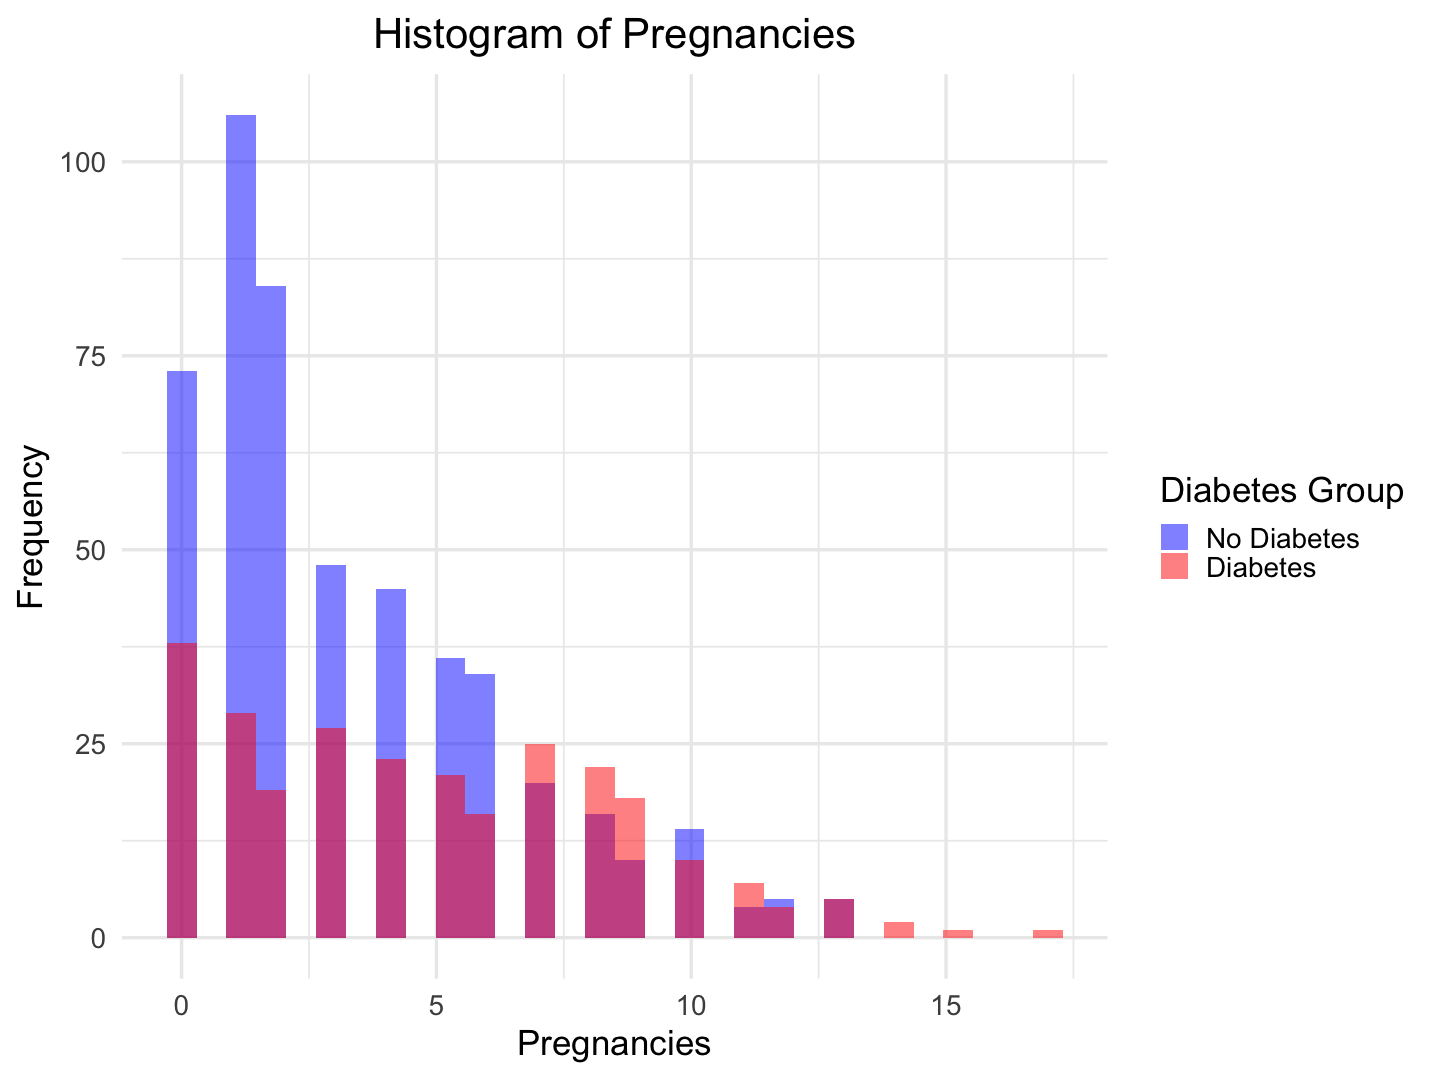

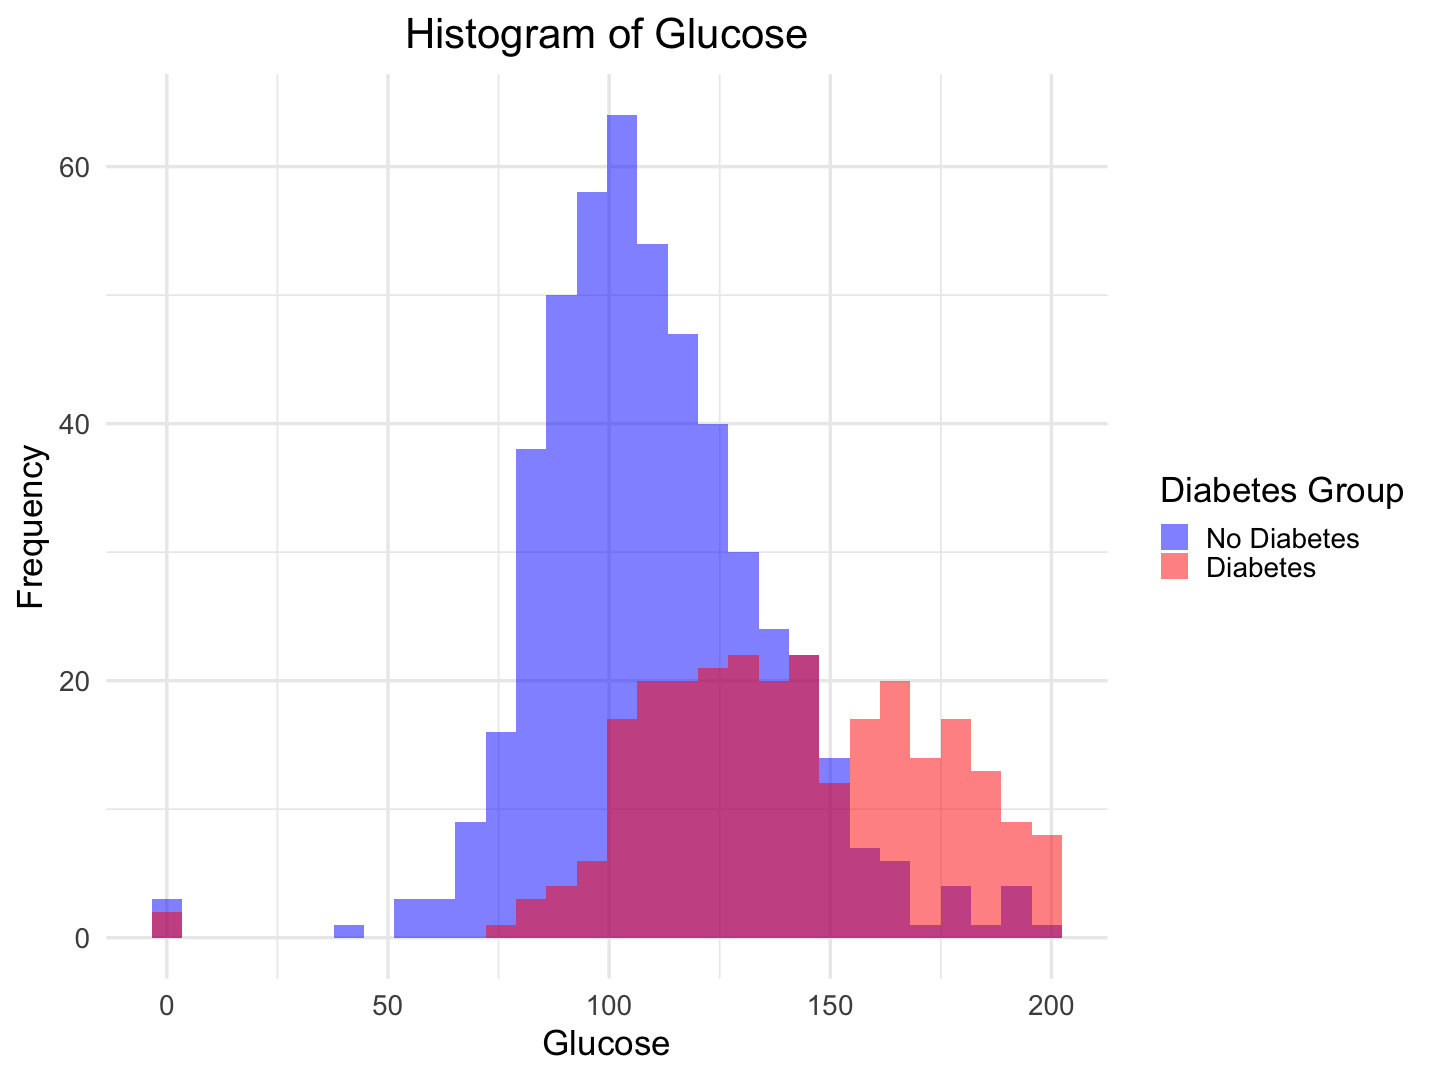

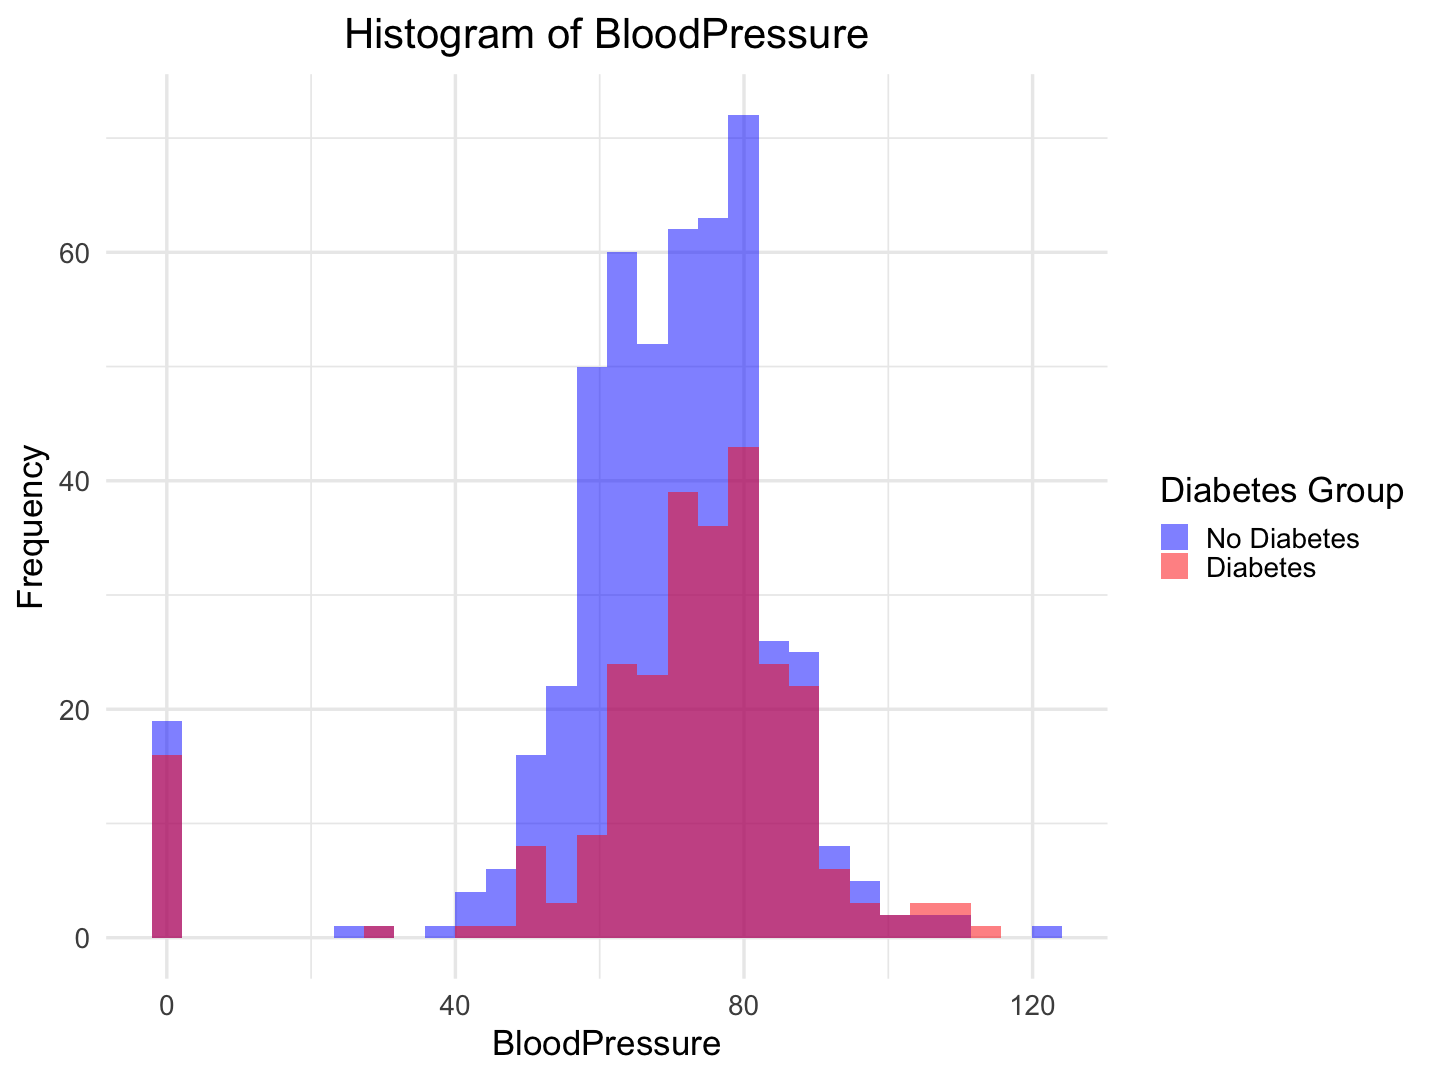

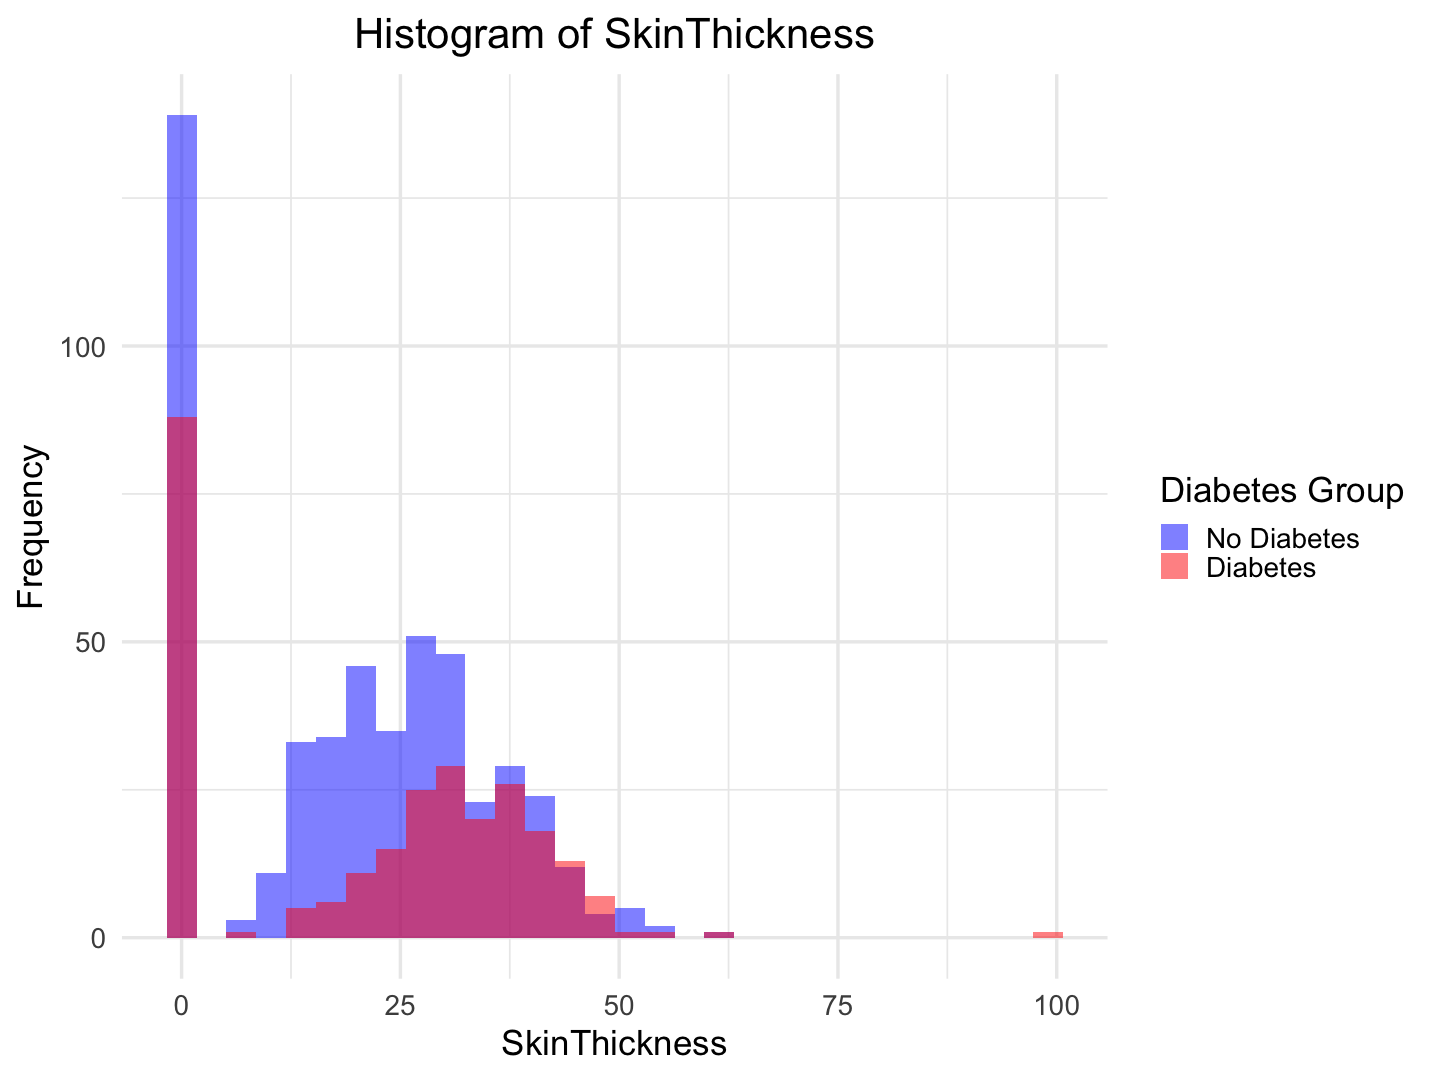

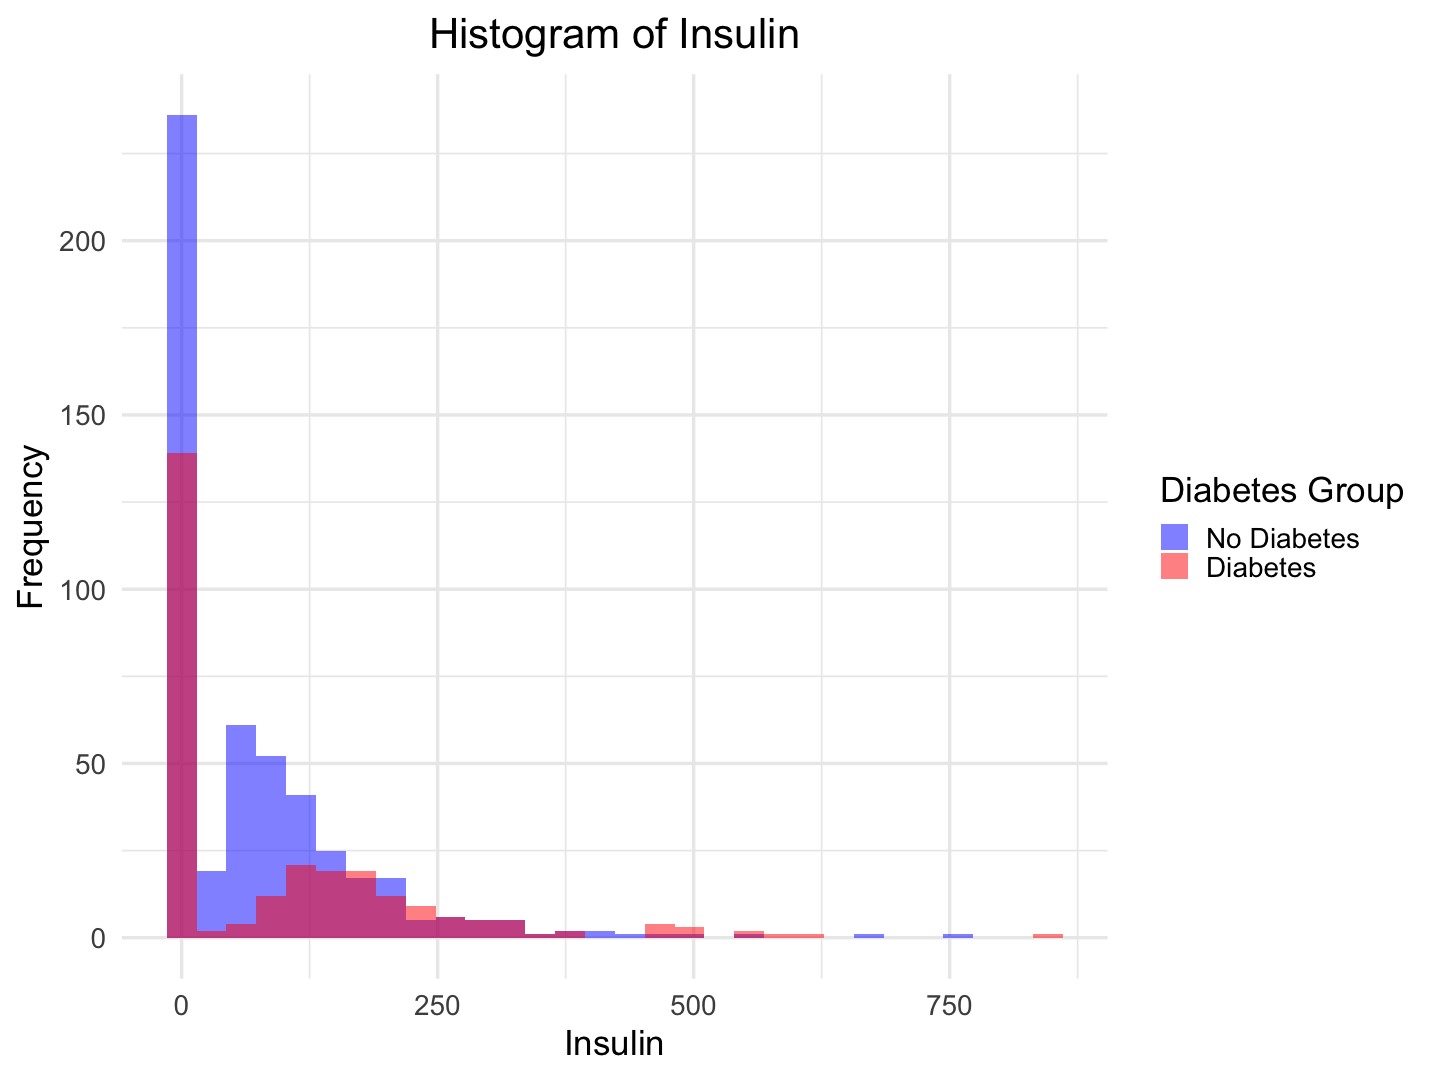

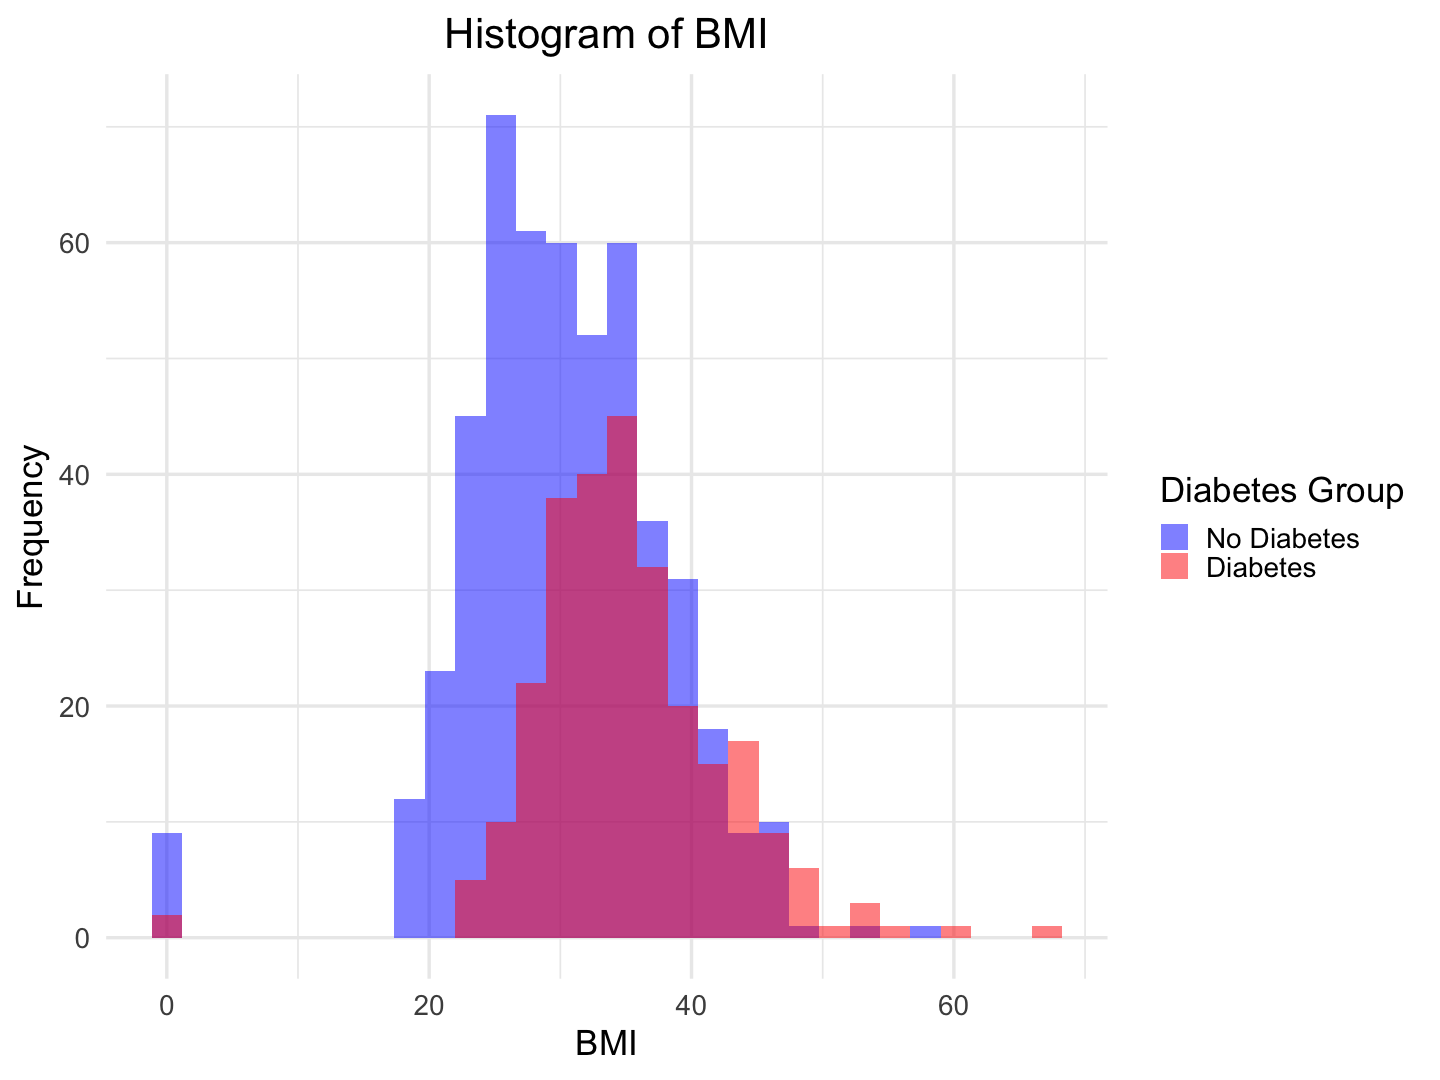

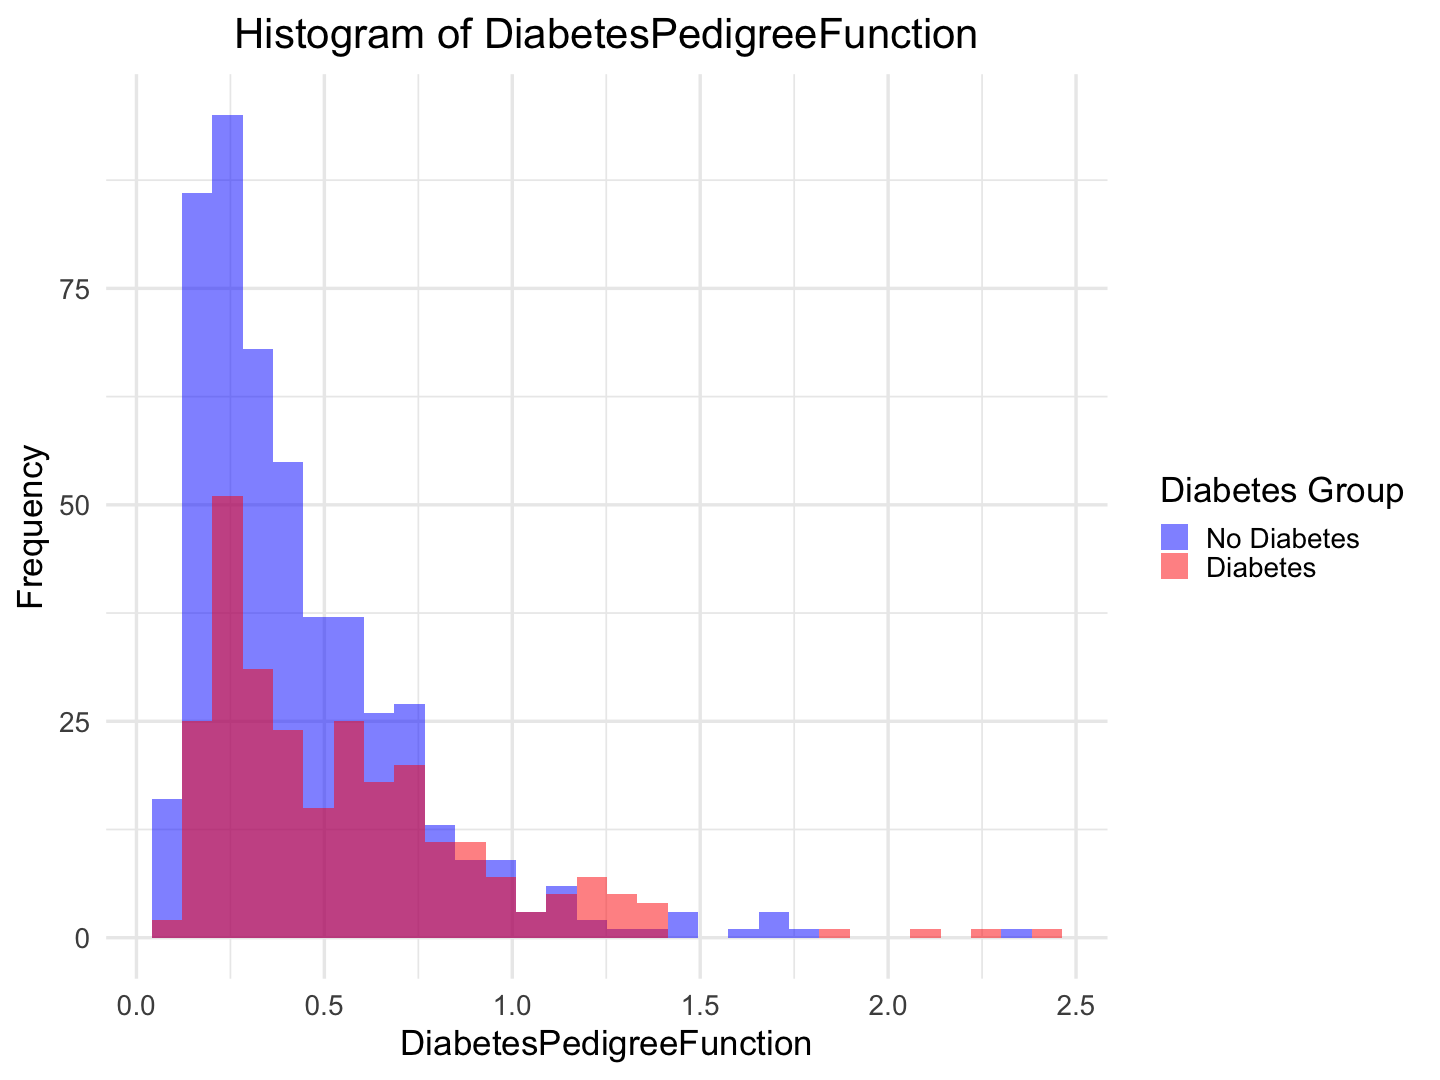

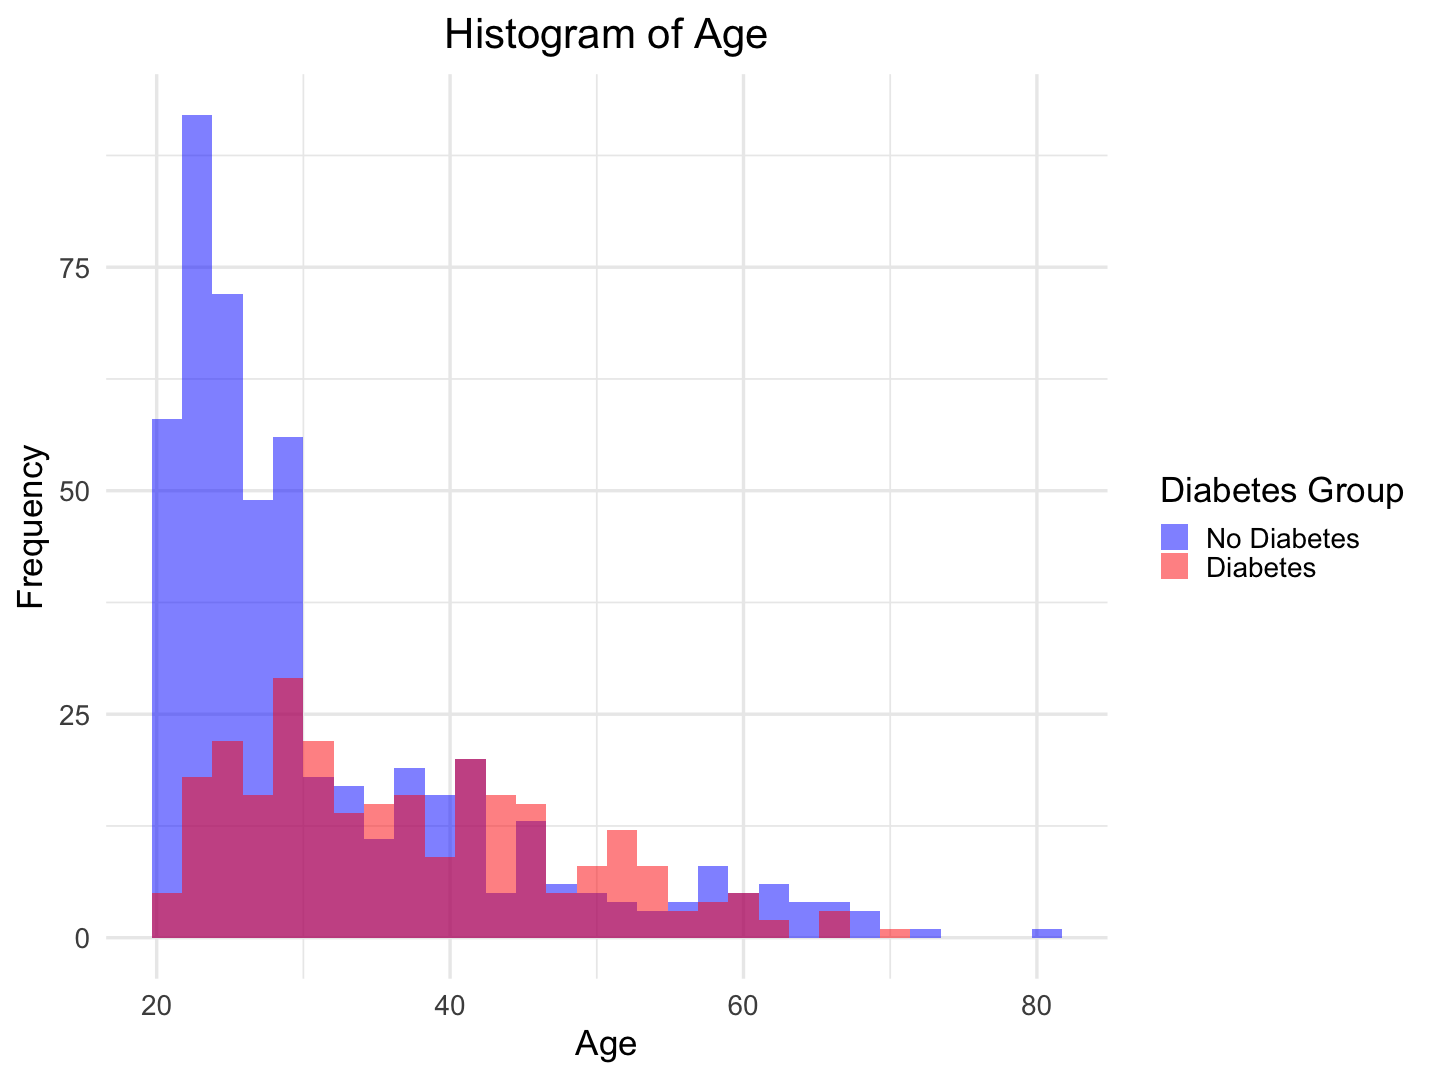

In [3]:
options(repr.plot.width = 12, repr.plot.height = 9)

numeric_cols <- c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age")

for (feat in numeric_cols) {
  feat_plot <- ggplot(diabetes_data) + 
    geom_histogram(aes(x = get(feat), fill = as.factor(Outcome)), bins = 30, alpha = 0.5, position = "identity") +
    labs(title = paste("Histogram of", feat), x = feat, y = "Frequency") +
    scale_fill_manual(values = c("blue", "red"), labels = c("No Diabetes", "Diabetes")) +
    guides(fill = guide_legend(title = "Diabetes Group")) +
    theme_minimal(base_size = 21) + 
    theme(plot.title = element_text(hjust = 0.5))
  
  print(feat_plot)
}

### Preliminary Observations from Histograms

- **Pregnancies**: The distribution is right-skewed, with most values clustered around lower numbers. Patients with diabetes tend to have a higher number of pregnancies compared to those without diabetes.

- **Glucose**: There is a noticeable difference between the glucose levels of diabetic and non-diabetic patients. Diabetic patients generally have higher glucose levels, creating a clearer separation in the histogram.

- **Blood Pressure**: Both groups have similar distributions with a slight trend towards higher blood pressure in diabetic patients.

- **Skin Thickness**: Diabetic patients tend to have thicker skin measurements than non-diabetic patients.

- **Insulin**: Diabetic patients generally show a wider range of insulin values, with a tendency towards higher levels.

- **BMI**: Both groups show a right-skewed distribution, but diabetic patients tend to have higher BMI values on average compared to non-diabetic patients.

- **Diabetes Pedigree Function**: The distribution is right-skewed, with diabetic patients showing a slightly higher pedigree function, indicating a higher likelihood of diabetes based on family history.

- **Age**: The distribution is right-skewed, with a higher proportion of younger individuals. Diabetic patients tend to be older on average than non-diabetic patients.


# Methods and Plan

## Proposed Method: Regularized Logistic Regression (Ridge and LASSO)

### Method Appropriate
- **Predictive Accuracy:** Regularized methods reduce overfitting by penalizing large coefficients, improving generalization on unseen data.
- **Feature Selection:** LASSO regression identifies significant predictors by shrinking irrelevant coefficients to zero.
- **Handling Multicollinearity:** Ridge regression distributes coefficient weights among correlated predictors, addressing multicollinearity effectively.

### Assumptions Required
- **Linearity in Log-Odds:** Predictors relate linearly to the log-odds of the outcome.
- **Scaled Data:** Predictors must be standardized due to the penalty terms.
- **No Perfect Multicollinearity:** Ridge handles multicollinearity but not perfect correlation.

### Potential Limitations
- **Non-Linearity:** Regularized logistic regression cannot model non-linear relationships without transformations.
- **Hyperparameter Tuning:** Selecting the regularization parameter (`lambda`) requires cross-validation, adding computational overhead.
- **Feature Scaling:** Predictors must be scaled, which may be unintuitive.

### Implementation Steps
1. **Data Imputation**
   - Zero values in features like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` were treated as missing.
   - The `mice` package with Predictive Mean Matching imputed missing values, merged back into the dataset.

2. **Data Scaling**
   - Continuous variables were standardized (mean = 0, SD = 1) for consistent penalty application in regression.

3. **Logistic Regression**
   - Baseline model to classify diabetes status.
   - Evaluated using ROC-AUC.

4. **Ridge Regression (L2 Regularization)**
   - Penalizes large coefficients to prevent overfitting, retaining all features.
   - Implemented using `glmnet`, with cross-validation to determine optimal `lambda`.

5. **LASSO Regression (L1 Regularization)**
   - Shrinks some coefficients to zero for feature selection.
   - Implemented using `glmnet`, with cross-validation to identify optimal `lambda`.

6. **Model Comparison**
   - Regularized models (Ridge and LASSO) compared to logistic regression for performance and feature selection.
   - Metrics: ROC-AUC for performance evaluation.

### Summary
Regularized Logistic Regression (Ridge and LASSO) offers robust predictive modeling and feature selection by addressing overfitting and multicollinearity. LASSO enhances interpretability by selecting key predictors, while Ridge ensures stability when multicollinearity exists. Preprocessing steps like imputation and scaling ensure the dataset is clean and ready for analysis. These methods balance interpretability, performance, and efficiency, making them suitable for diabetes dataset.

# Implementation of A Proposed Model

In [4]:
diabetes_data <- diabetes_data %>%
  mutate(across(c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"), ~ na_if(., 0)))

In [5]:
imputed_data <- complete(mice(diabetes_data, method = 'pmm', seed = 123), 1)
diabetes_imputed <- diabetes_data |>
    mutate(Glucose = imputed_data$Glucose,
           BloodPressure = imputed_data$BloodPressure,
           SkinThickness = imputed_data$SkinThickness,
           Insulin = imputed_data$Insulin,
           BMI = imputed_data$BMI)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

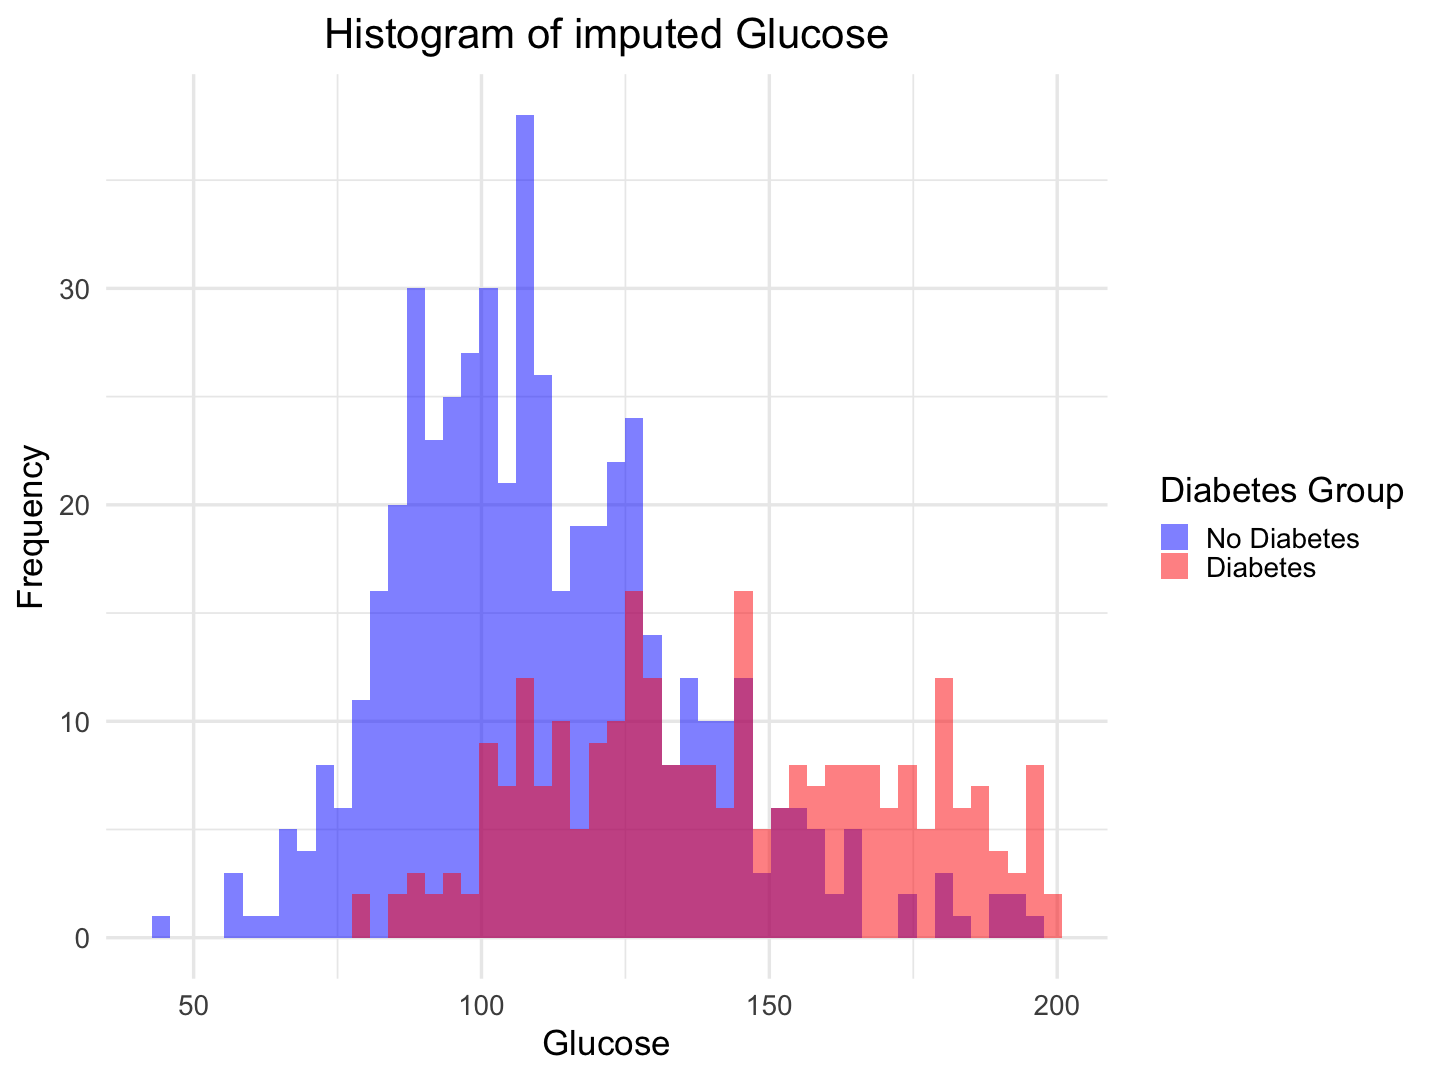

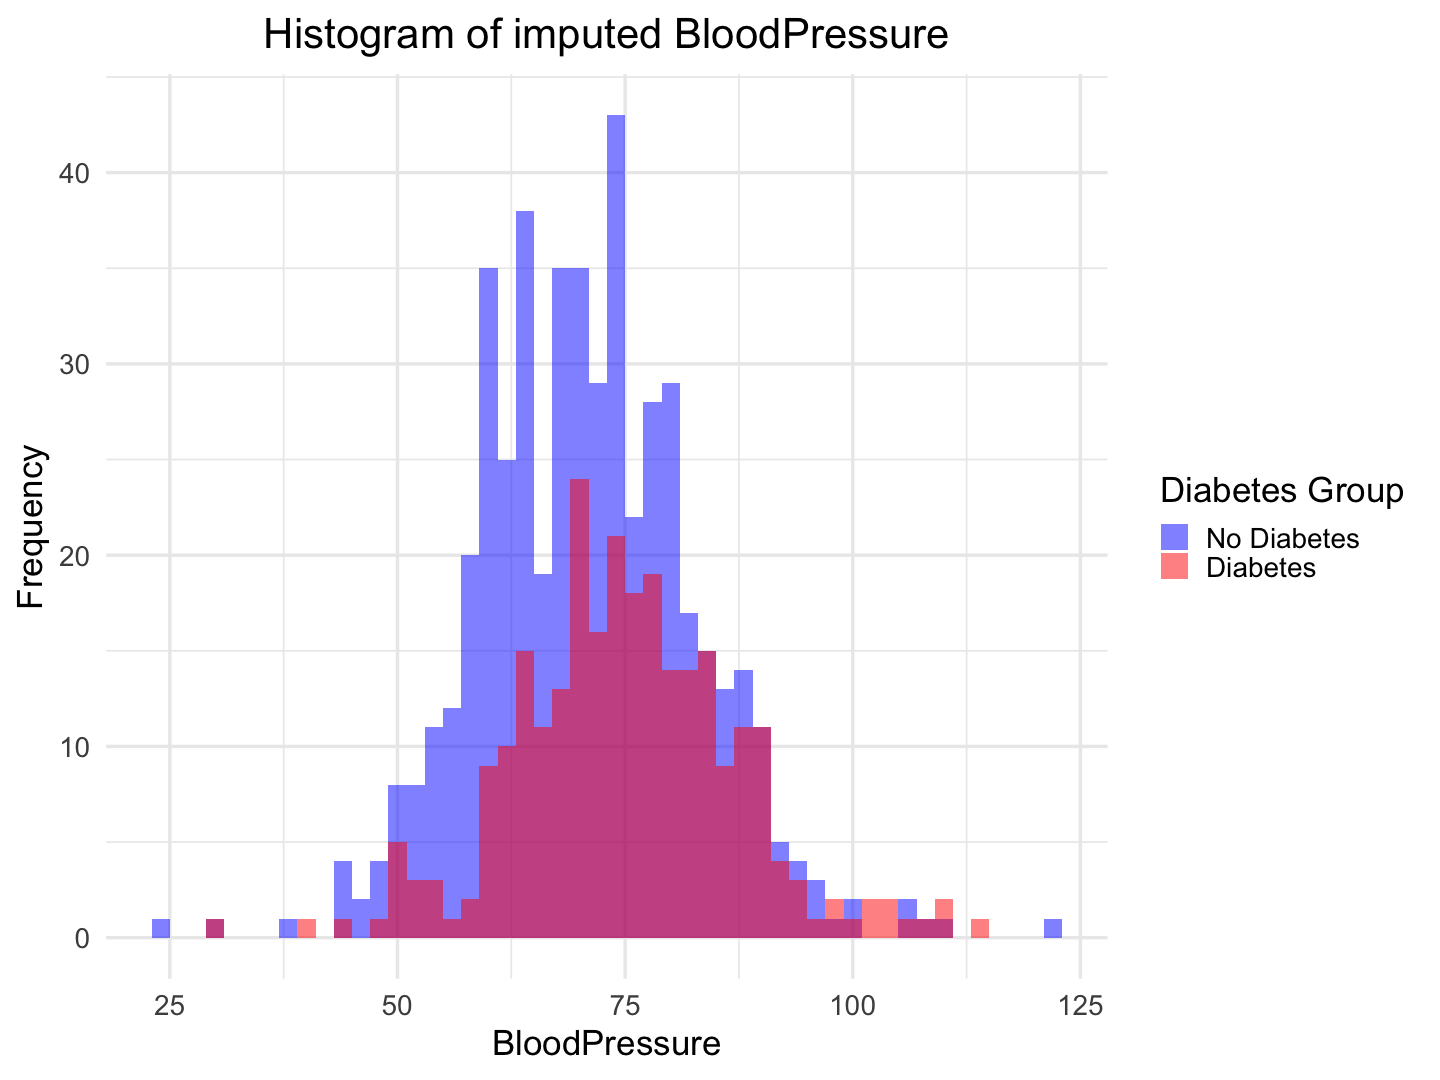

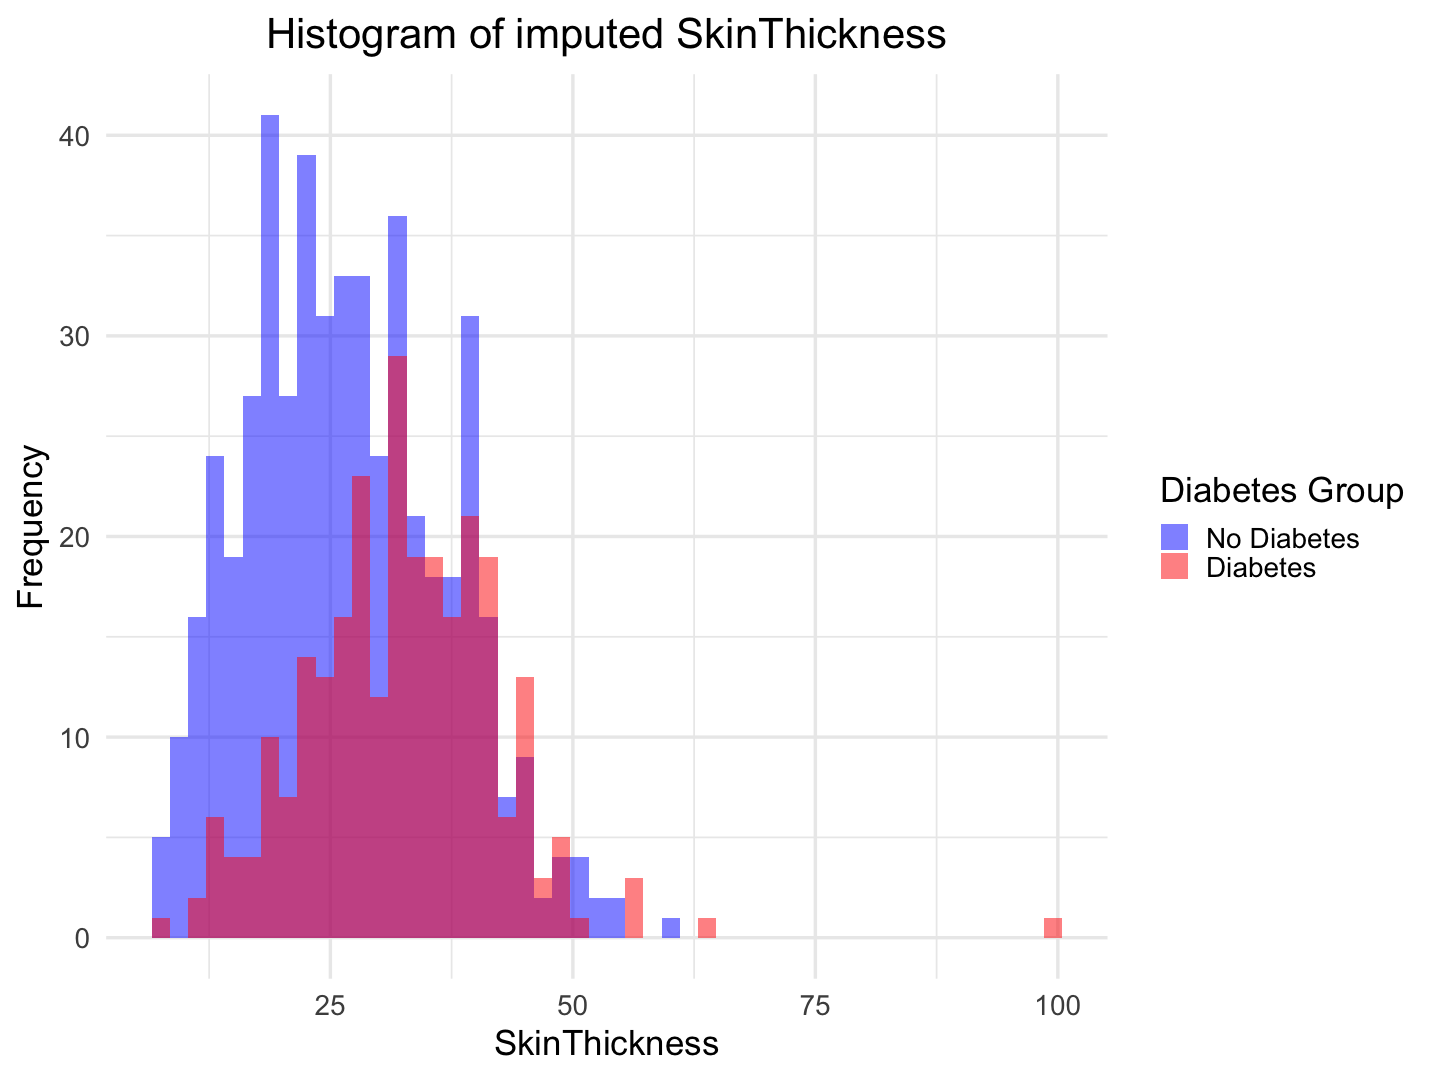

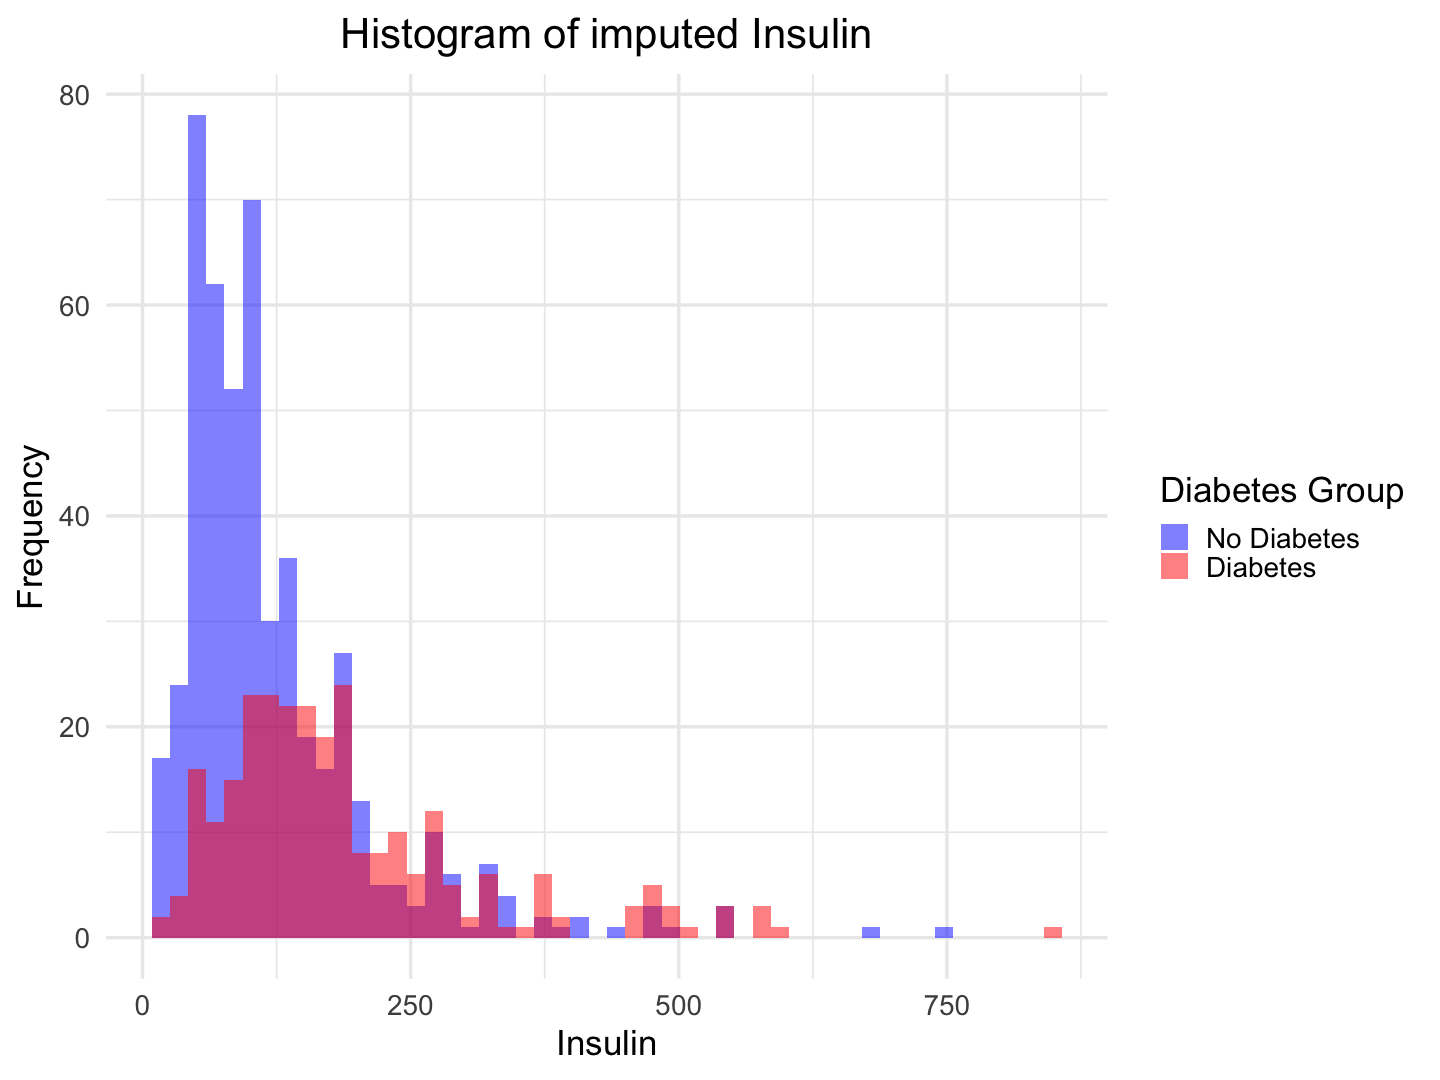

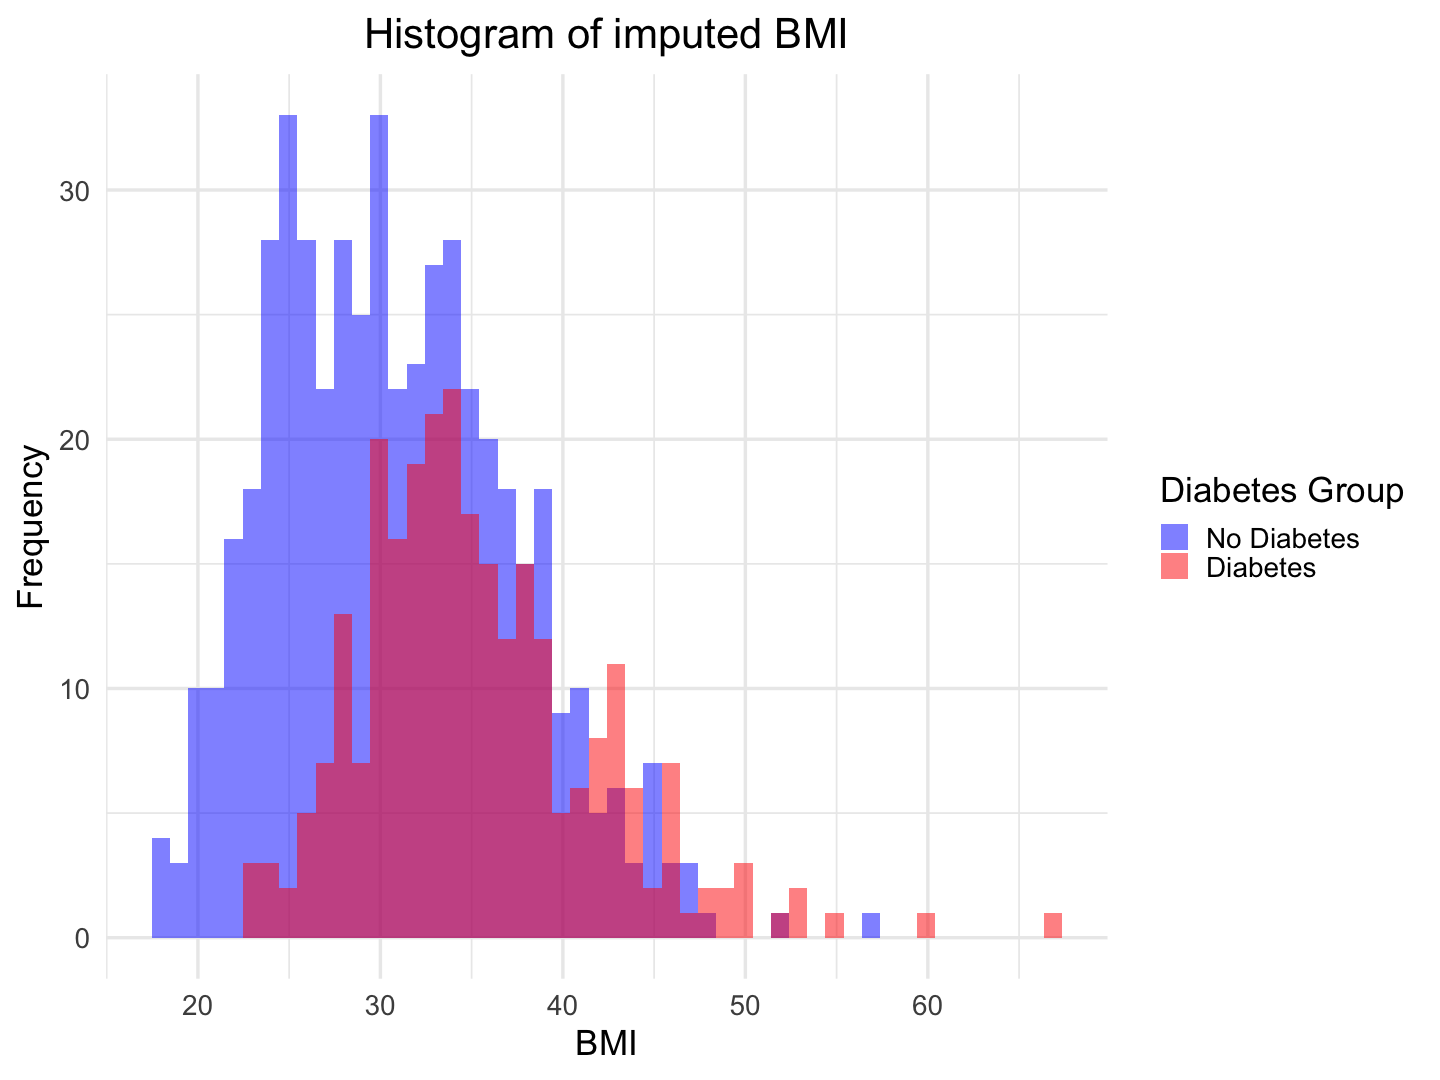

In [6]:
options(repr.plot.width = 12, repr.plot.height = 9)

imputed_numeric_cols <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")

for (feat in imputed_numeric_cols) {
  feat_plot <- ggplot(diabetes_imputed) + 
    geom_histogram(aes(x = get(feat), fill = as.factor(Outcome)), bins = 50, alpha = 0.5, position = "identity") +
    labs(title = paste("Histogram of imputed", feat), x = feat, y = "Frequency") +
    scale_fill_manual(values = c("blue", "red"), labels = c("No Diabetes", "Diabetes")) +
    guides(fill = guide_legend(title = "Diabetes Group")) +
    theme_minimal(base_size = 21) + 
    theme(plot.title = element_text(hjust = 0.5))
  
  print(feat_plot)
}

In [7]:
diabetes_imputed_scaled <- as.data.frame(scale(diabetes_imputed[ , !names(diabetes_imputed) %in% "Outcome"]))
diabetes_imputed_scaled <- diabetes_imputed_scaled |>
    mutate(Outcome = diabetes_imputed$Outcome)

head(diabetes_imputed_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.6395305,0.8622811,-0.02466284,0.59961545,0.7520436,0.1720251,0.4681869,1.42506672,1
2,-0.8443348,-1.1967757,-0.51033103,0.02506191,-0.9773665,-0.8402418,-0.3648230,-0.19054773,0
3,1.2330766,2.0062015,-0.67222042,-1.50708089,-0.1928918,-1.3174534,0.6040037,-0.10551539,1
4,-0.8443348,-1.0660419,-0.51033103,-0.54949164,-0.4692409,-0.6233275,-0.9201630,-1.04087112,0
5,-1.1411079,0.5027632,-2.61489318,0.59961545,0.1904311,1.5458160,5.4813370,-0.02048305,1
6,0.3427574,-0.1835890,0.13722656,0.50385653,-0.6029582,-0.9848514,-0.8175458,-0.27558007,0


In [8]:
set.seed(123)

diabetes_sample <-
    diabetes_imputed_scaled %>%
    mutate(id = row_number())

training_diabetes <- 
    diabetes_sample %>%
    slice_sample(prop = 0.70)

testing_diabetes <- 
    diabetes_sample %>% 
    anti_join(training_diabetes, by = "id") %>%
    select(-id)

training_diabetes <-
    training_diabetes |>
    select(-id)

In [9]:
set.seed(123)

diabetes_X_train <- model.matrix(object = Outcome ~ .,
  data = training_diabetes)[, -1]

diabetes_Y_train <- as.matrix(training_diabetes[, "Outcome"])

diabetes_X_test <- model.matrix(object = Outcome ~ .,
  data = testing_diabetes)[, -1]

diabetes_Y_test <- as.matrix(testing_diabetes[, "Outcome"])

### Logistic Regression without Penalization

In [10]:
set.seed(123)

diabetes_logistic_model <- 
    glm(
        formula = Outcome ~ .,
        data = training_diabetes,
        family = binomial)

ROC_full_log <- 
    roc(
        response = training_diabetes$Outcome, 
        predictor = predict(diabetes_logistic_model, type = "response"))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [11]:
set.seed(123)

num.folds <- 10
folds <- createFolds(training_diabetes$Outcome, k = num.folds)

auc.cv <- numeric(num.folds)

for (fold in 1:num.folds) {
  train_data <- training_diabetes[-folds[[fold]], ]
  test_data <- training_diabetes[folds[[fold]], ]
  
  model <- glm(Outcome ~ ., data = train_data, family = "binomial")
  
  predictions <- predict(model, newdata = test_data, type = "response")
  
  auc.cv[fold] <- roc(test_data$Outcome, predictions)$auc
}

diabetes_cv_ordinary <- round(mean(auc.cv), 7)

cat("Cross-validation AUC for the ordinary logistic model:", 
diabetes_cv_ordinary)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Cross-validation AUC for the ordinary logistic model: 0.8397451

In [12]:
diabetes_AUC_models <- 
    tibble(
        model = "ordinary",
        auc = diabetes_cv_ordinary)

diabetes_AUC_models

model,auc
<chr>,<dbl>
ordinary,0.8397451


### Logistic Regression with Ridge Regularization

In [13]:
set.seed(123)

diabetes_cv_lambda_ridge <- 
    cv.glmnet(
        x = diabetes_X_train, 
        y = diabetes_Y_train,
        alpha = 0,
        family = "binomial",
        type.measure = "auc",
        nfolds = 10)

diabetes_cv_lambda_ridge


Call:  cv.glmnet(x = diabetes_X_train, y = diabetes_Y_train, type.measure = "auc",      nfolds = 10, alpha = 0, family = "binomial") 

Measure: AUC 

    Lambda Index Measure       SE Nonzero
min 0.1075    84  0.8487 0.008078       8
1se 0.3954    70  0.8415 0.008946       8

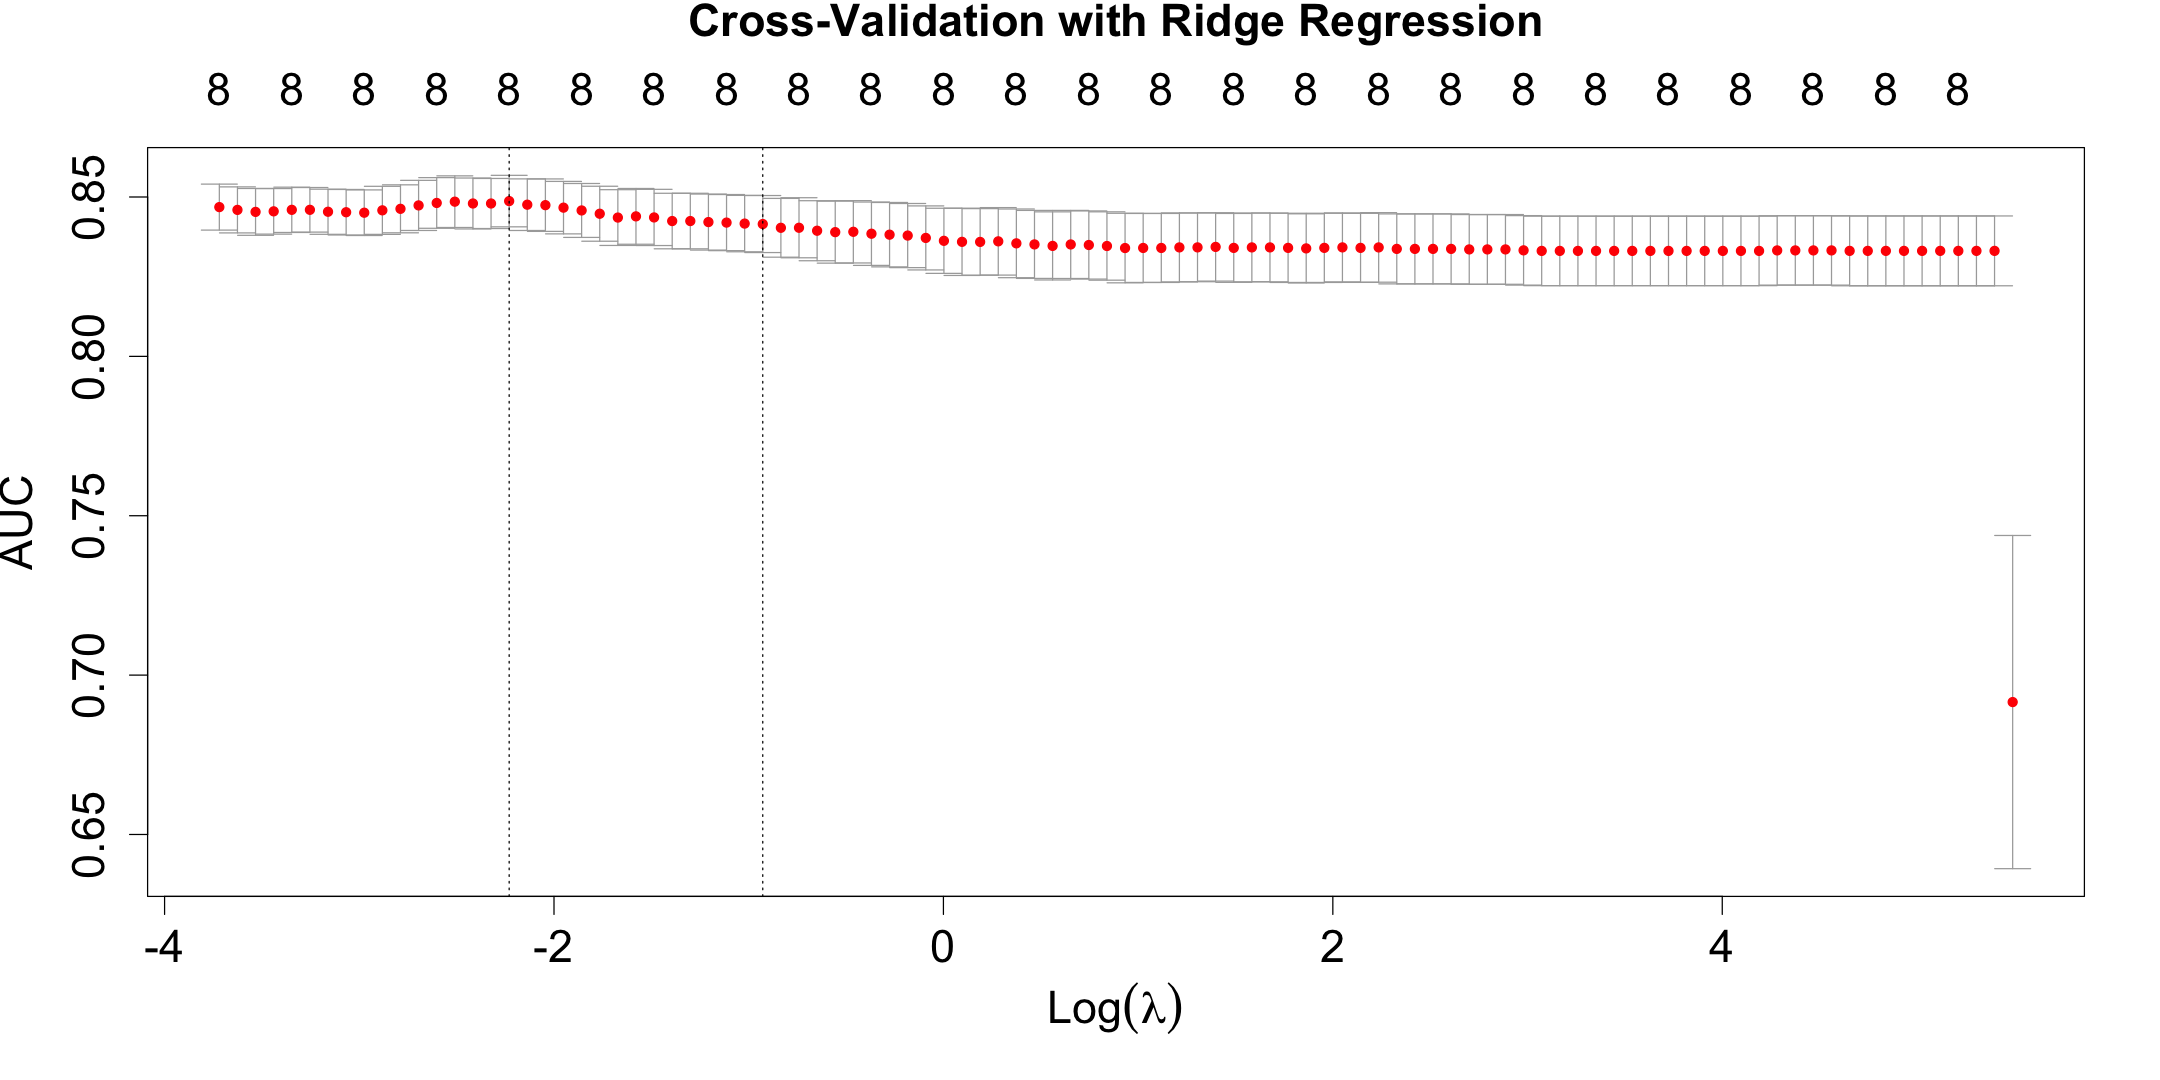

In [14]:
options(repr.plot.width = 18, repr.plot.height = 9)
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(diabetes_cv_lambda_ridge, 
     main = "Cross-Validation with Ridge Regression\n\n")

In [15]:
diabetes_cv_lambda_max_AUC_ridge <- round(diabetes_cv_lambda_ridge$lambda.min, 4)
diabetes_cv_lambda_1se_AUC_ridge <- round(diabetes_cv_lambda_ridge$lambda.1se, 4)

print(paste("The lambda_min in Ridge Regression:", diabetes_cv_lambda_max_AUC_ridge))
print(paste("The lambda_1se in Ridge Regression:", diabetes_cv_lambda_1se_AUC_ridge))

[1] "The lambda_min in Ridge Regression: 0.1075"
[1] "The lambda_1se in Ridge Regression: 0.3954"


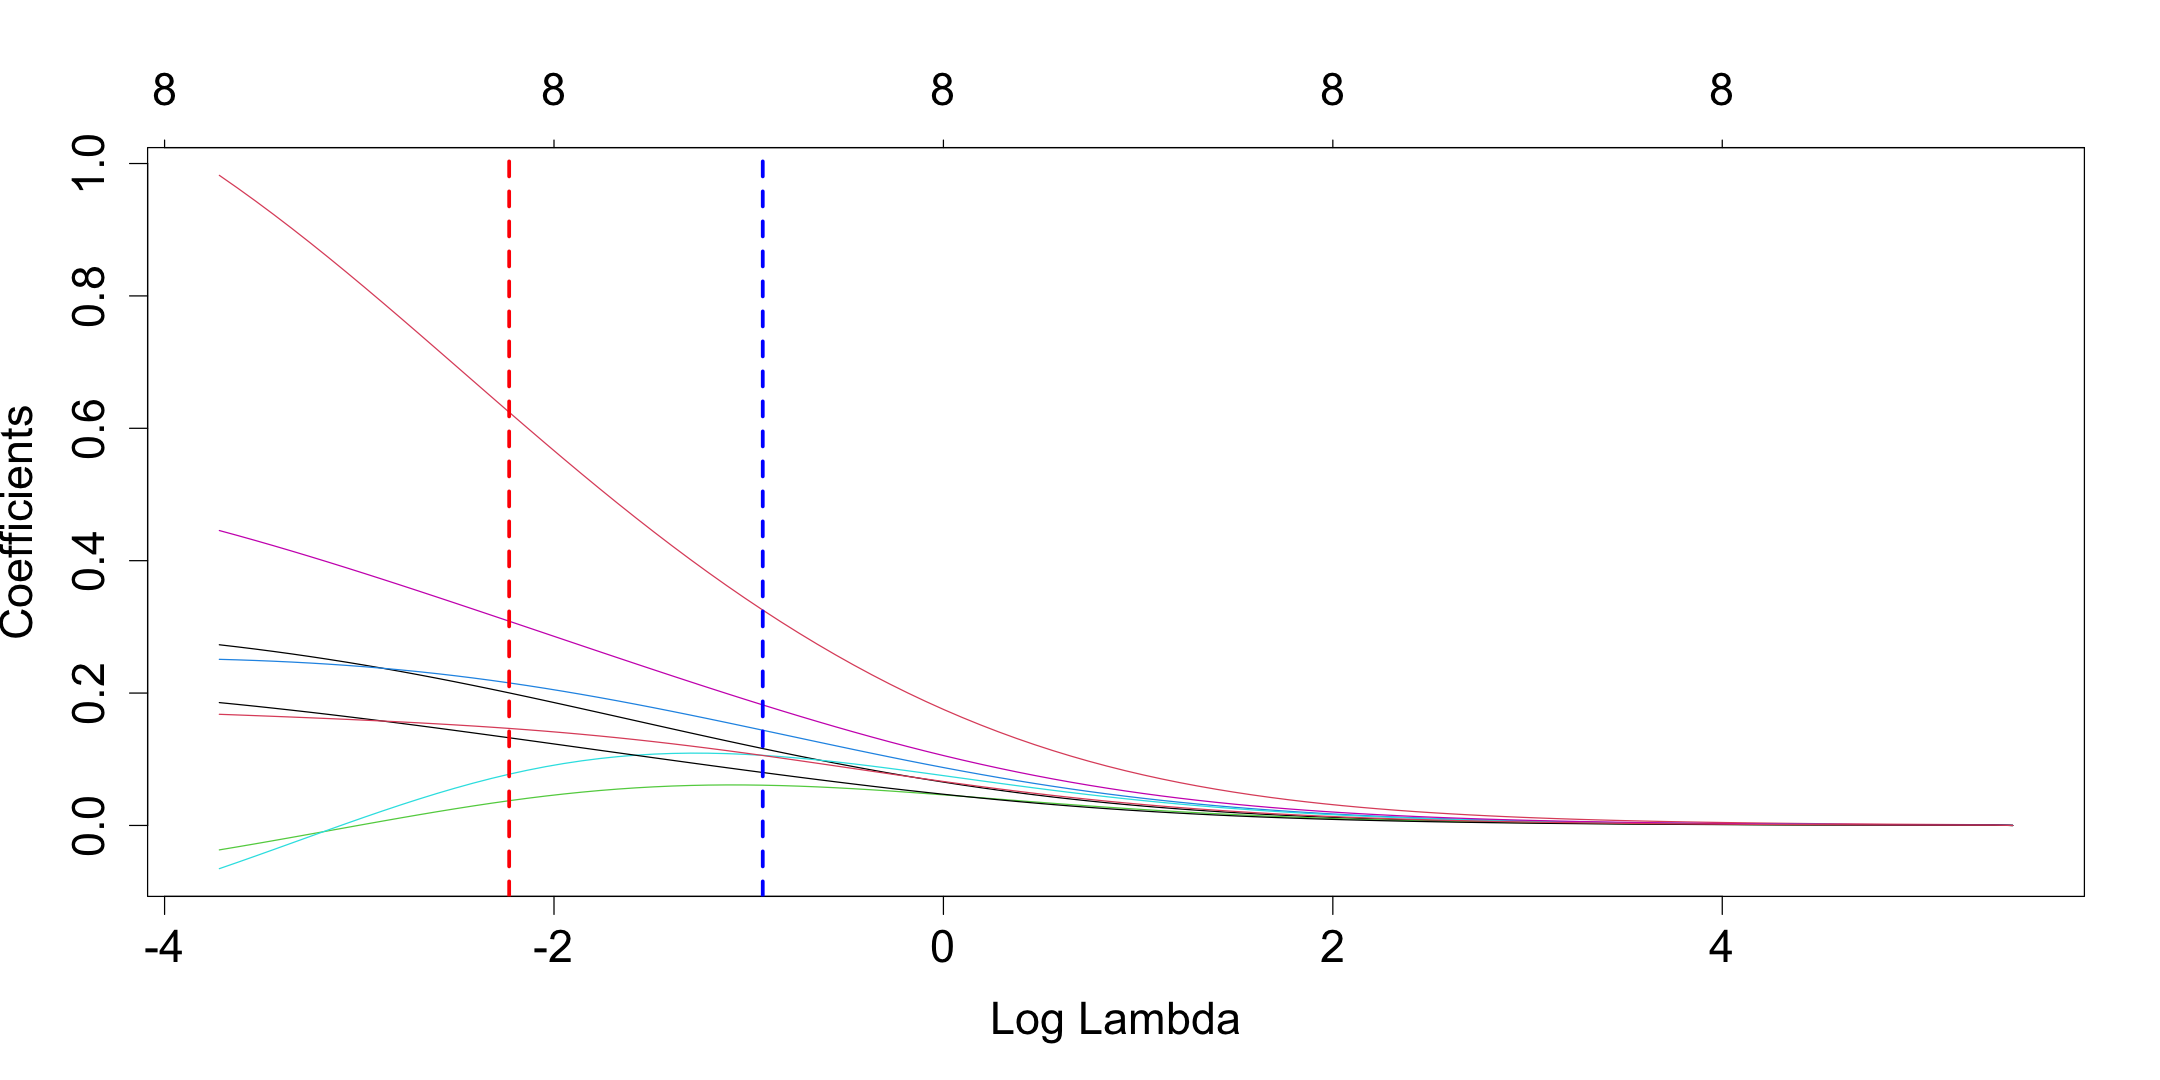

In [16]:
options(repr.plot.width = 18, repr.plot.height = 9)
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(diabetes_cv_lambda_ridge$glmnet.fit, "lambda")

abline(v = log(diabetes_cv_lambda_max_AUC_ridge), 
       col = "red", 
       lwd = 3, 
       lty = 2)

abline(v = log(diabetes_cv_lambda_1se_AUC_ridge), 
       col = "blue", 
       lwd = 3, 
       lty = 2)

In [17]:
set.seed(123)

diabetes_ridge_max_AUC <- 
    glmnet(
        x = diabetes_X_train, y = diabetes_Y_train,
        alpha = 0,
        family = "binomial",
        lambda = diabetes_cv_lambda_max_AUC_ridge)

diabetes_ridge_1se_AUC <- 
    glmnet(
        x = diabetes_X_train, y = diabetes_Y_train,
        alpha = 0,
        family = "binomial",
        lambda = diabetes_cv_lambda_1se_AUC_ridge)

coef(diabetes_ridge_max_AUC)
coef(diabetes_ridge_1se_AUC)

9 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              -0.77220267
Pregnancies               0.20026600
Glucose                   0.62426627
BloodPressure             0.03737394
SkinThickness             0.21537945
Insulin                   0.07743786
BMI                       0.30858578
DiabetesPedigreeFunction  0.13247145
Age                       0.14660745

9 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              -0.68847483
Pregnancies               0.11617479
Glucose                   0.32539796
BloodPressure             0.06082815
SkinThickness             0.14388817
Insulin                   0.10592569
BMI                       0.18210569
DiabetesPedigreeFunction  0.08000110
Age                       0.10571791

In [18]:
diabetes_AUC_models <- 
    diabetes_AUC_models %>% 
    add_row(model = "ridge_lambda_min", auc = diabetes_cv_lambda_ridge$cvm[diabetes_cv_lambda_ridge$index[1]]) |>
    add_row(model = "ridge_lambda_1se", auc = diabetes_cv_lambda_ridge$cvm[diabetes_cv_lambda_ridge$index["1se",]])

diabetes_AUC_models

model,auc
<chr>,<dbl>
ordinary,0.8397451
ridge_lambda_min,0.8487185
ridge_lambda_1se,0.8415147


### Logistic Regression with LASSO Regularization

In [19]:
set.seed(123)

diabetes_cv_lambda_LASSO <- cv.glmnet(
  x = diabetes_X_train, y = diabetes_Y_train,
  alpha = 1,
  family = "binomial",
  type.measure = "auc",
  nfolds = 10
)

diabetes_cv_lambda_LASSO


Call:  cv.glmnet(x = diabetes_X_train, y = diabetes_Y_train, type.measure = "auc",      nfolds = 10, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure       SE Nonzero
min 0.01793    29  0.8455 0.009388       6
1se 0.04990    18  0.8364 0.012345       4

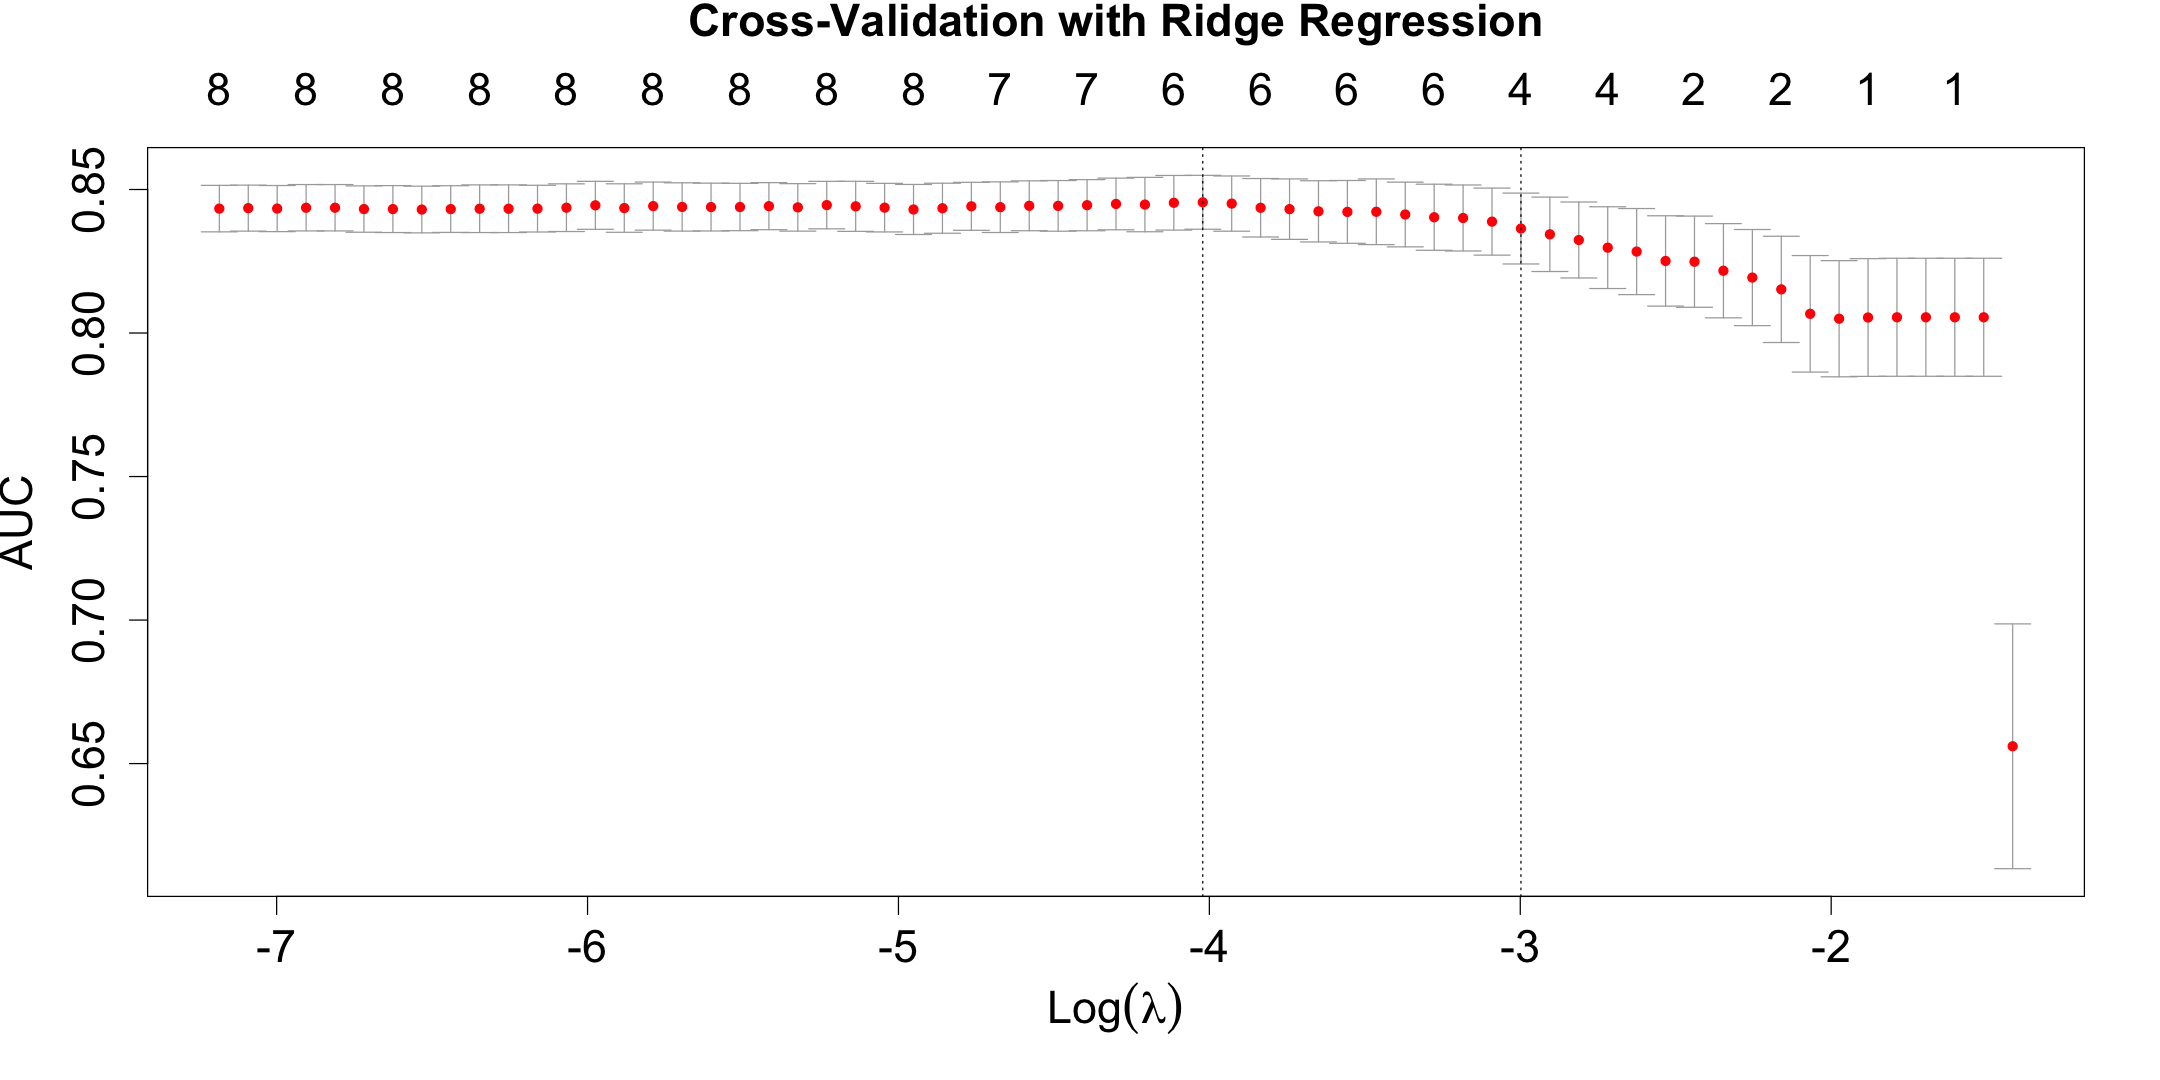

In [20]:
options(repr.plot.width = 18, repr.plot.height = 9)
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(diabetes_cv_lambda_LASSO, 
     main = "Cross-Validation with Ridge Regression\n\n")

In [21]:
diabetes_cv_lambda_max_AUC_LASSO <- round(diabetes_cv_lambda_LASSO$lambda.min, 4)
diabetes_cv_lambda_1se_AUC_LASSO <- round(diabetes_cv_lambda_LASSO$lambda.1se, 4)

print(paste("The lambda_min in LASSO Regression:", diabetes_cv_lambda_max_AUC_LASSO))
print(paste("The lambda_1se in LASSO Regression:", diabetes_cv_lambda_1se_AUC_LASSO))

[1] "The lambda_min in LASSO Regression: 0.0179"
[1] "The lambda_1se in LASSO Regression: 0.0499"


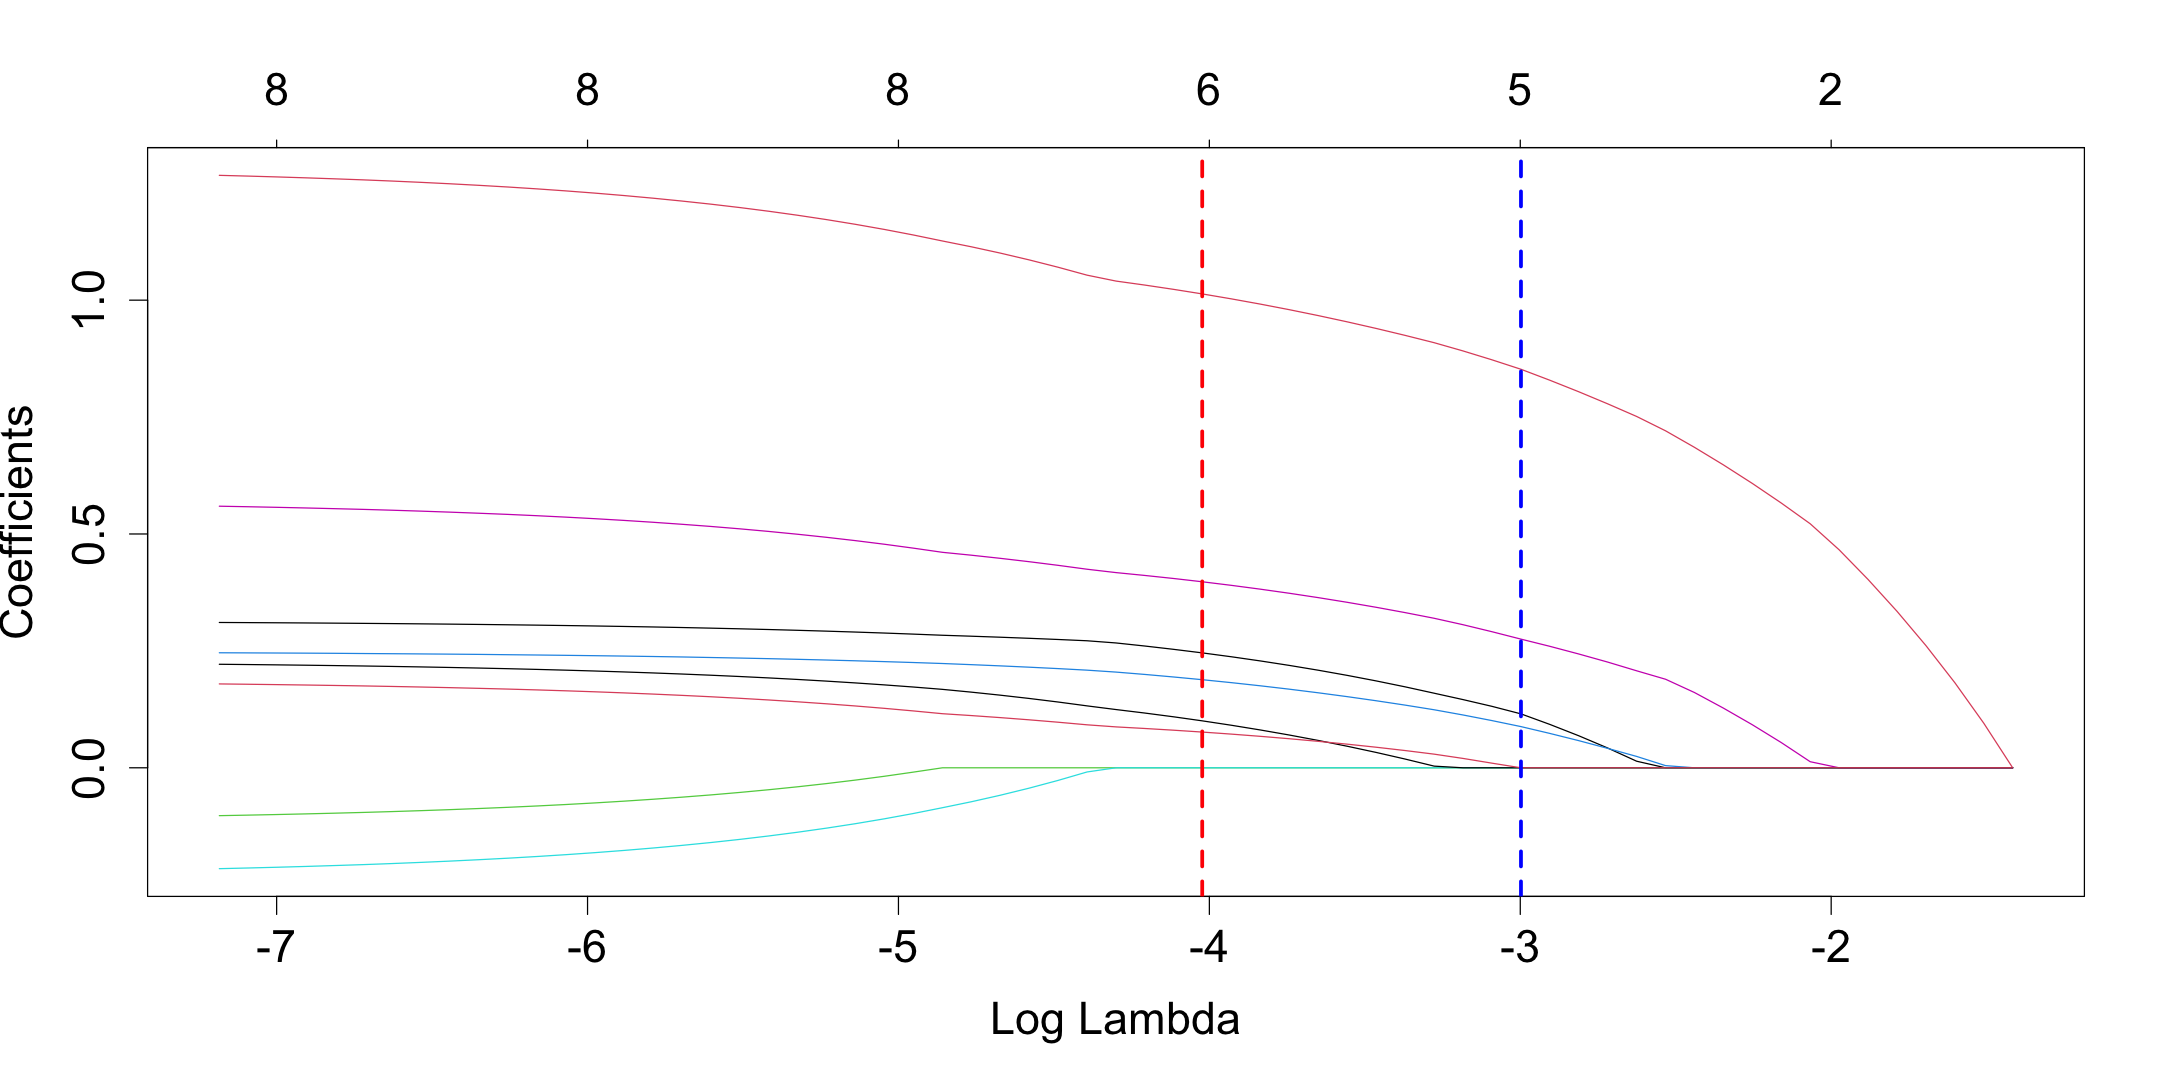

In [22]:
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(diabetes_cv_lambda_LASSO$glmnet.fit, "lambda")

abline(v = log(diabetes_cv_lambda_max_AUC_LASSO), 
       col = "red", 
       lwd = 3, 
       lty = 2)

abline(v = log(diabetes_cv_lambda_1se_AUC_LASSO), 
       col = "blue", 
       lwd = 3, 
       lty = 2)

In [23]:
set.seed(123)

diabetes_LASSO_max_AUC <- 
    glmnet(
        x = diabetes_X_train, 
        y = diabetes_Y_train,
        alpha = 1,
        family = "binomial",
        lambda = diabetes_cv_lambda_max_AUC_LASSO)

diabetes_LASSO_1se_AUC <- 
    glmnet(
        x = diabetes_X_train, 
        y = diabetes_Y_train,
        alpha = 1,
        family = "binomial",
        lambda = diabetes_cv_lambda_1se_AUC_LASSO)

coef(diabetes_LASSO_max_AUC)
coef(diabetes_LASSO_1se_AUC)

9 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              -0.84414611
Pregnancies               0.24573794
Glucose                   1.01332339
BloodPressure             .         
SkinThickness             0.18837453
Insulin                   .         
BMI                       0.39778557
DiabetesPedigreeFunction  0.10041293
Age                       0.07639703

9 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              -0.76583466
Pregnancies               0.11528638
Glucose                   0.85218805
BloodPressure             .         
SkinThickness             0.08790272
Insulin                   .         
BMI                       0.27529758
DiabetesPedigreeFunction  .         
Age                       .         

In [24]:
diabetes_AUC_models <- 
    diabetes_AUC_models %>% 
    add_row(model = "lasso_lambda_min", auc = diabetes_cv_lambda_LASSO$cvm[diabetes_cv_lambda_LASSO$index[1]]) |>
    add_row(model = "lasso_lambda_1se", auc = diabetes_cv_lambda_LASSO$cvm[diabetes_cv_lambda_LASSO$index["1se",]])

diabetes_AUC_models

model,auc
<chr>,<dbl>
ordinary,0.8397451
ridge_lambda_min,0.8487185
ridge_lambda_1se,0.8415147
lasso_lambda_min,0.8455476
lasso_lambda_1se,0.8364027


### Results

In [25]:
ROC_lasso_lambda_min <- roc(
  response = testing_diabetes$Outcome,
  predictor = predict(diabetes_LASSO_max_AUC,
                      newx = diabetes_X_test)[,"s0"] )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



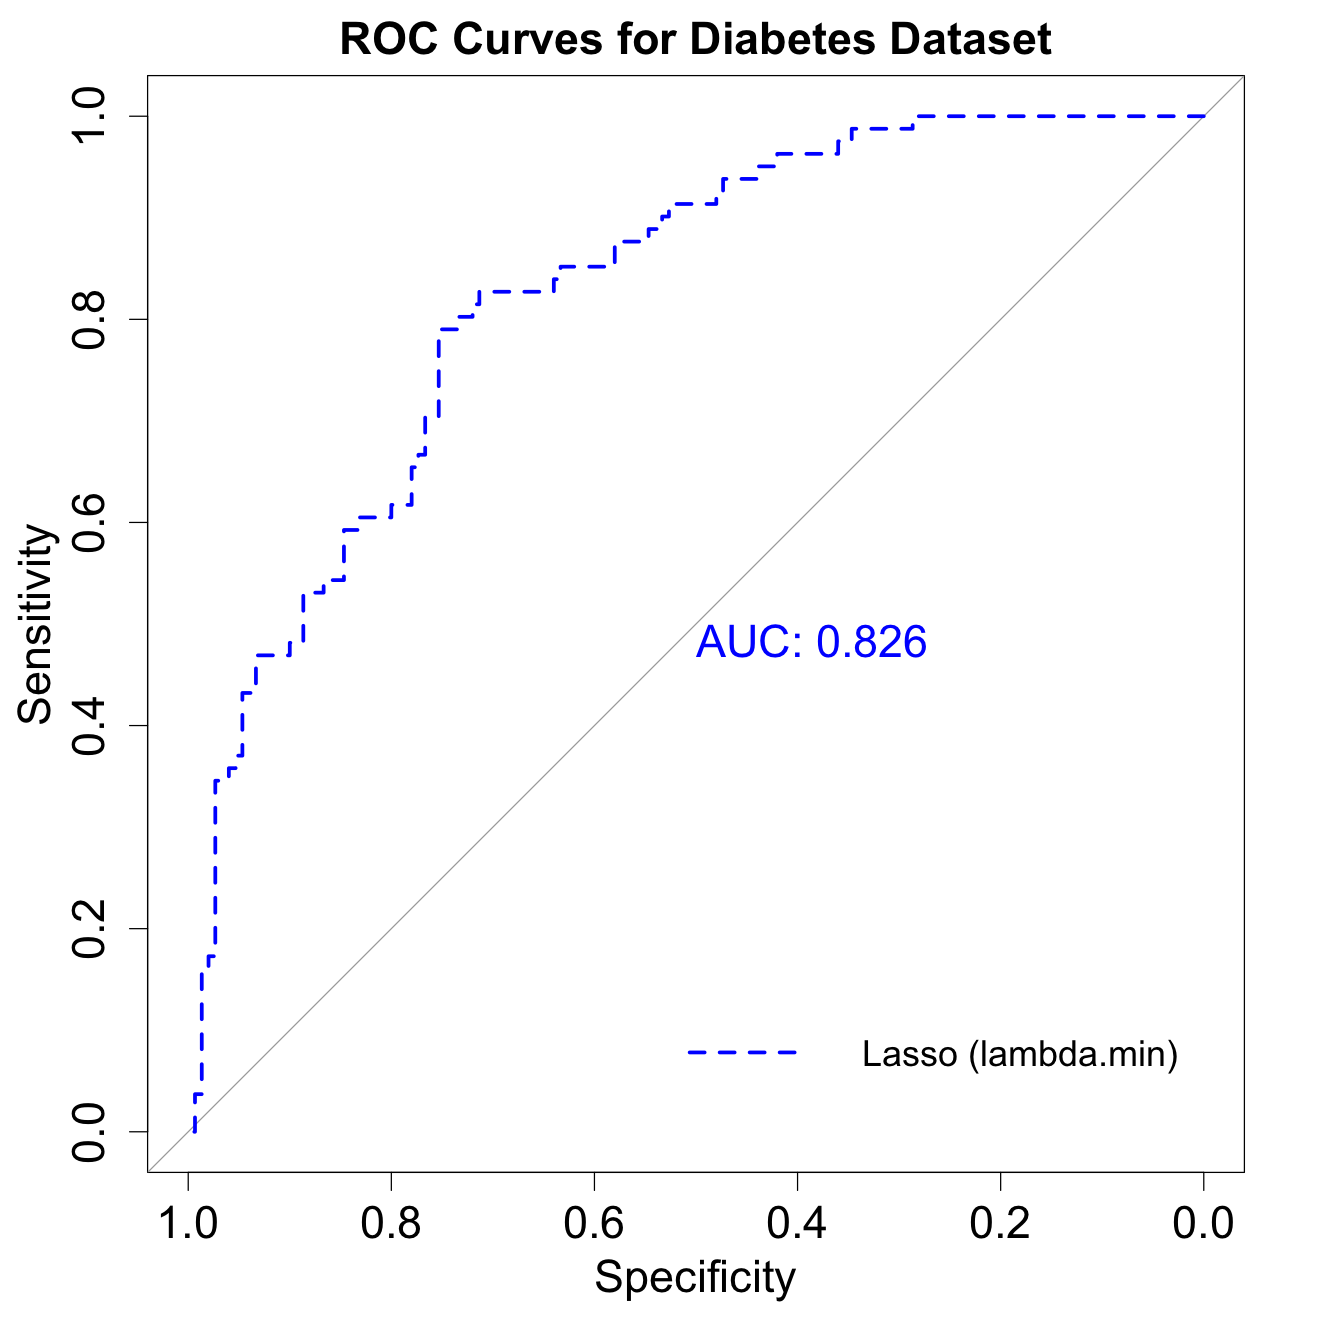

In [26]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_lasso_lambda_min,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", inset = c(-0.2, 0), legend = "Lasso (lambda.min)",
       col = "blue", 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

In [27]:
ROC_lasso_lambda_1se <- roc(
  response = testing_diabetes$Outcome,
  predictor = predict(diabetes_LASSO_1se_AUC,
                      newx = diabetes_X_test)[,"s0"] )

ROC_ridge_lambda_min <- roc(
  response = testing_diabetes$Outcome,
  predictor = predict(diabetes_ridge_max_AUC,
                      newx = diabetes_X_test)[,"s0"] )

ROC_ridge_lambda_1se <- roc(
  response = testing_diabetes$Outcome,
  predictor = predict(diabetes_ridge_1se_AUC,
                      newx = diabetes_X_test)[,"s0"] )

ROC_ordinary <- roc(
  response = testing_diabetes$Outcome,
  predictor = predict(diabetes_logistic_model,
                      newdata = testing_diabetes))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



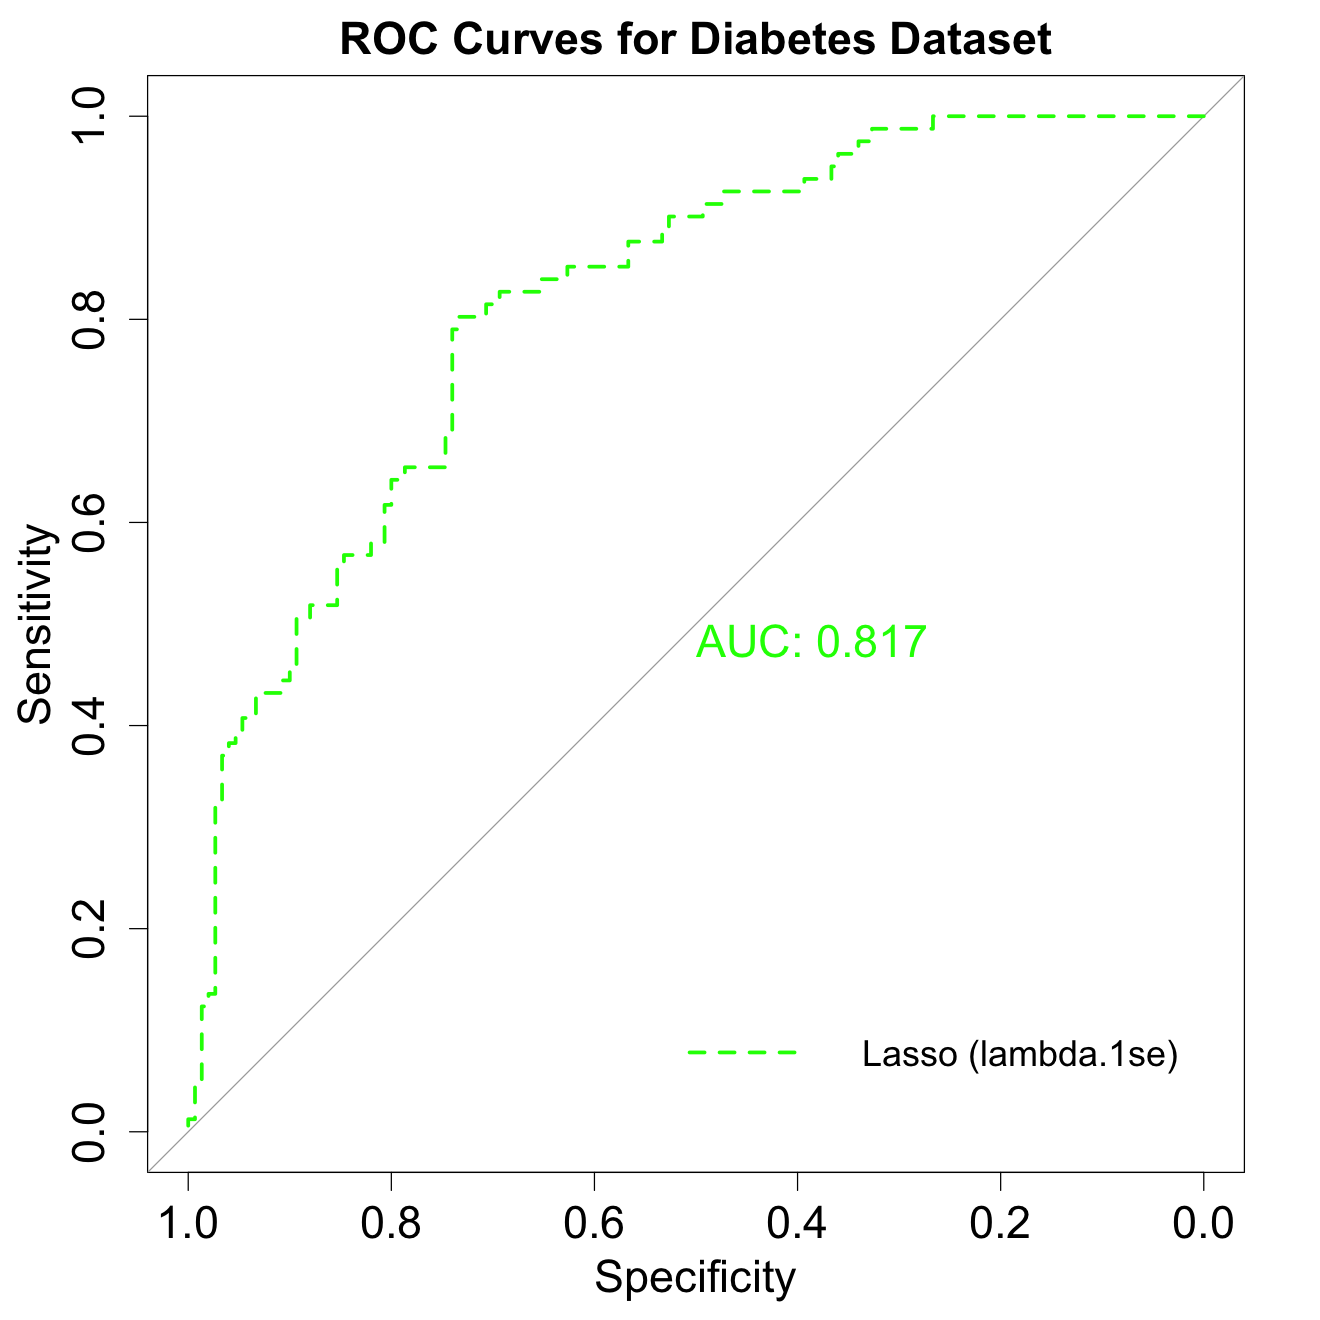

In [28]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_lasso_lambda_1se,
  print.auc = TRUE, col = "green", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", inset = c(-0.2, 0), legend = "Lasso (lambda.1se)",
       col = "green", 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

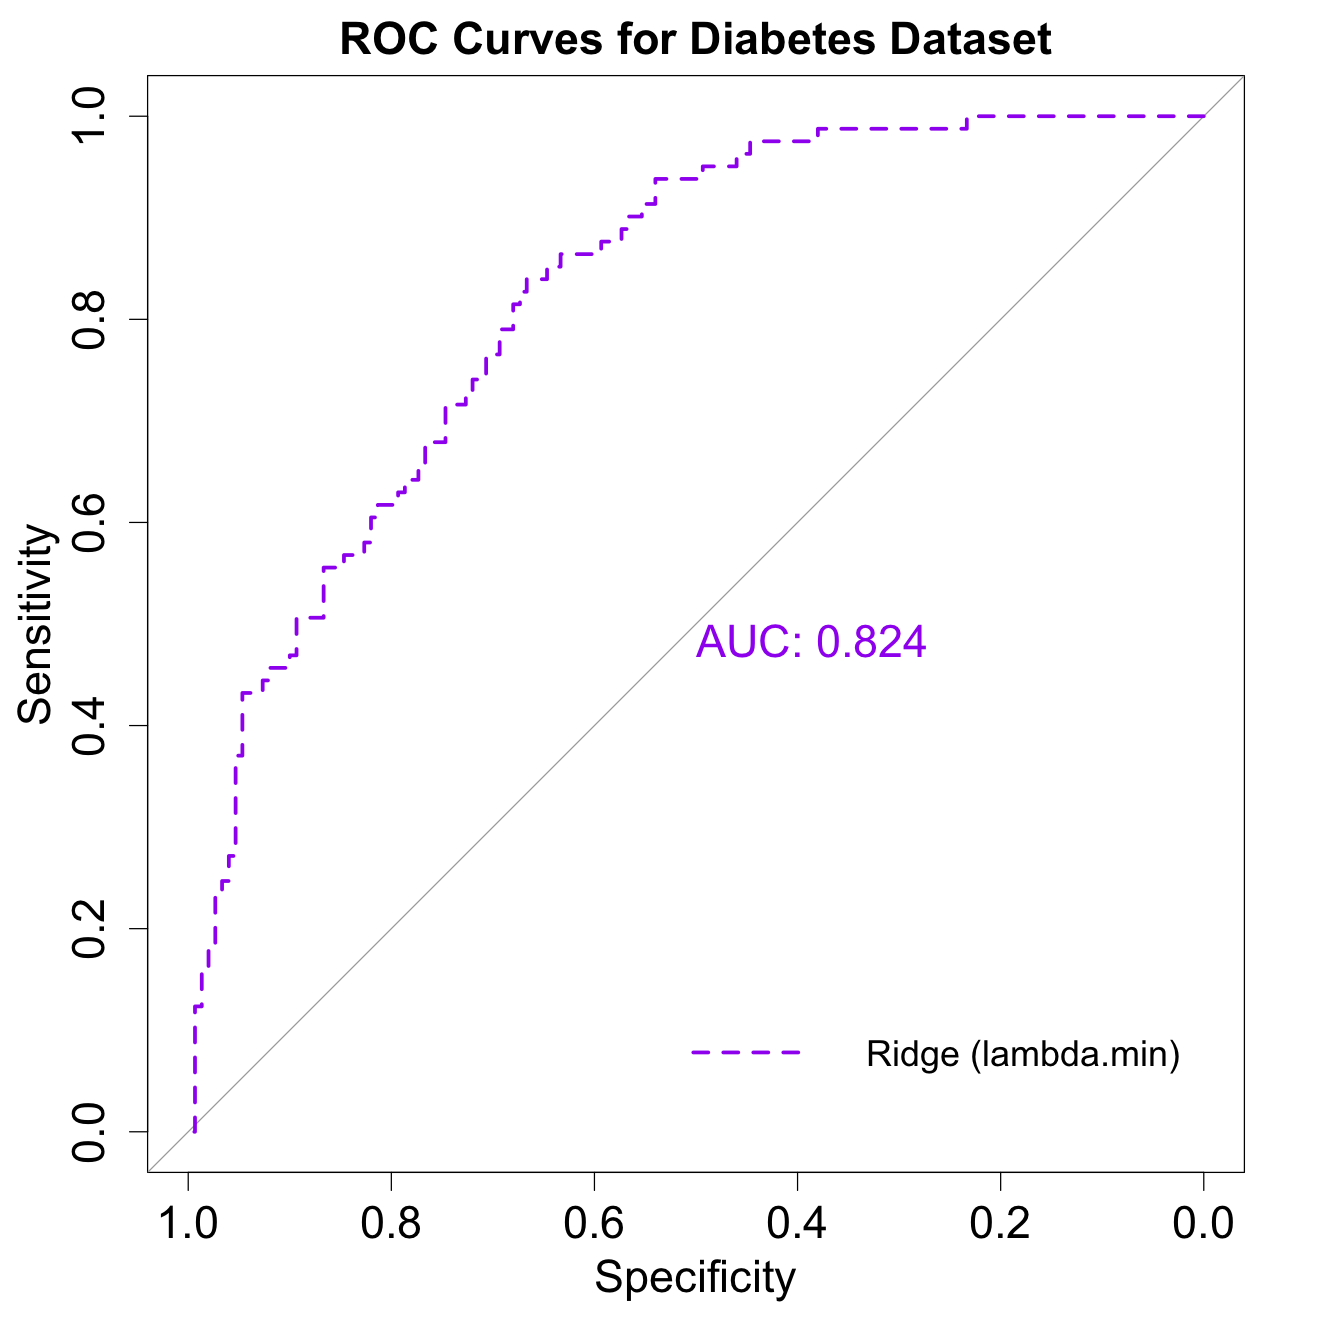

In [29]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_ridge_lambda_min,
  print.auc = TRUE, col = "purple", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", inset = c(-0.2, 0), legend = "Ridge (lambda.min)",
       col = "purple", 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

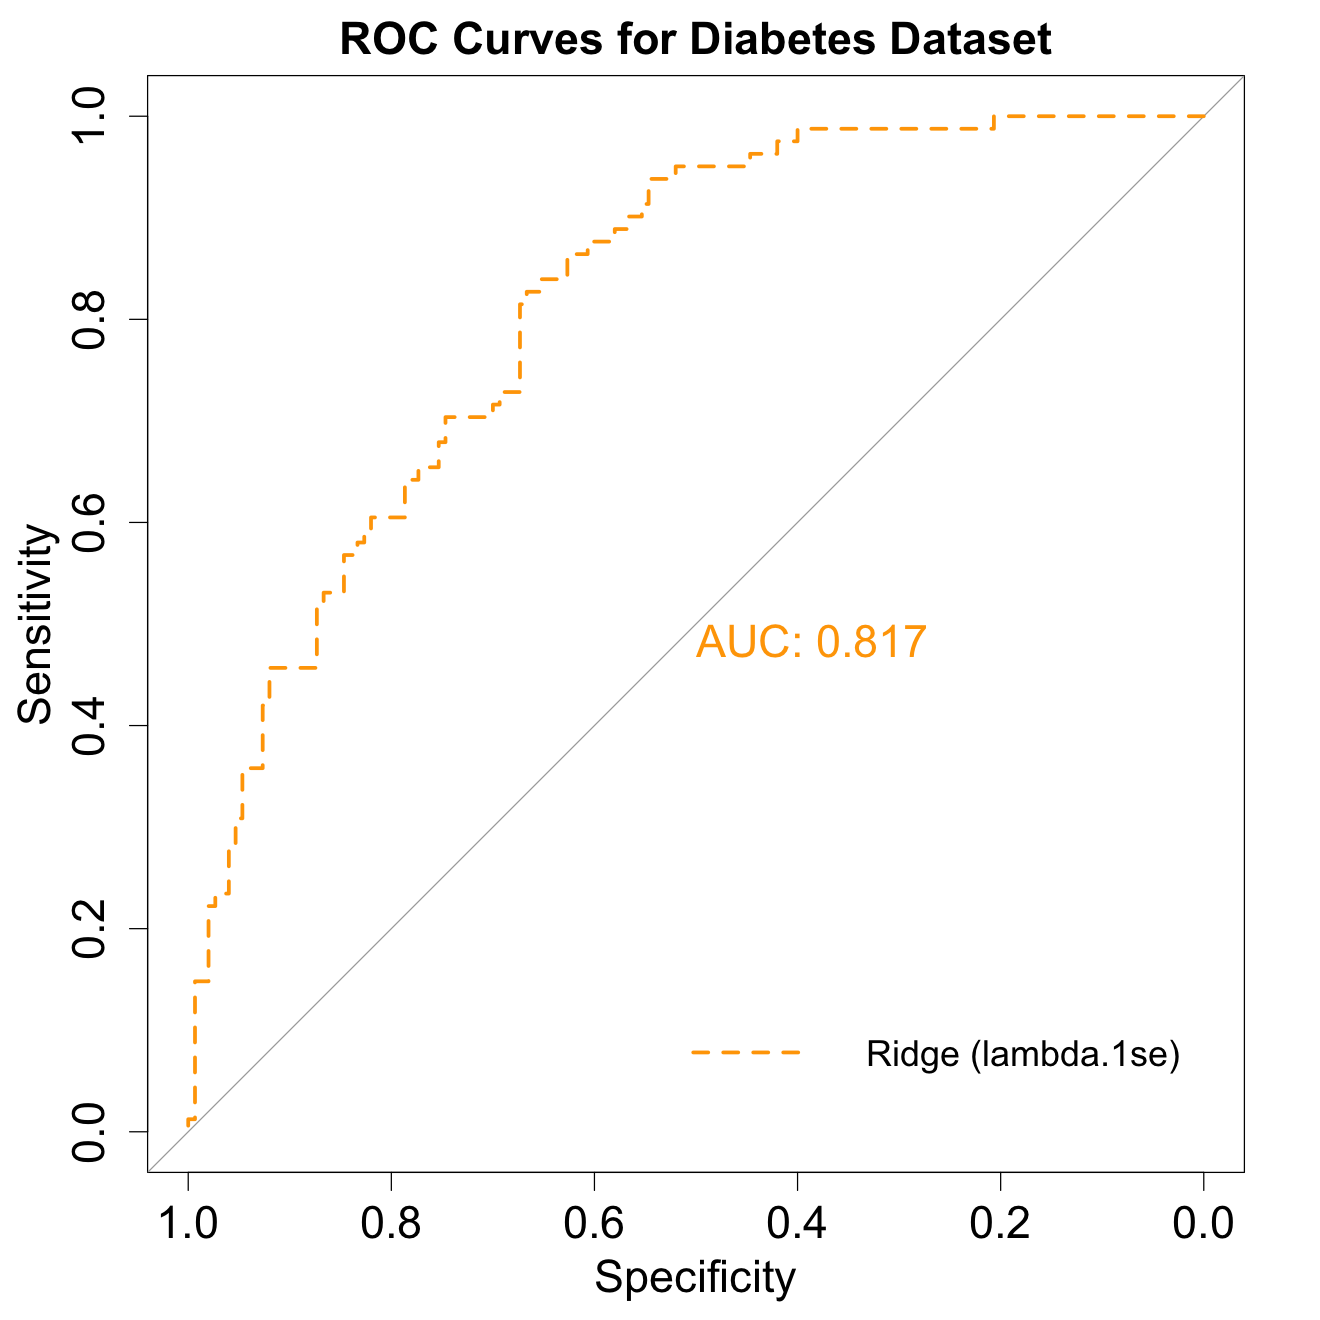

In [30]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_ridge_lambda_1se,
  print.auc = TRUE, col = "orange", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", inset = c(-0.2, 0), legend = "Ridge (lambda.1se)",
       col = "orange", 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

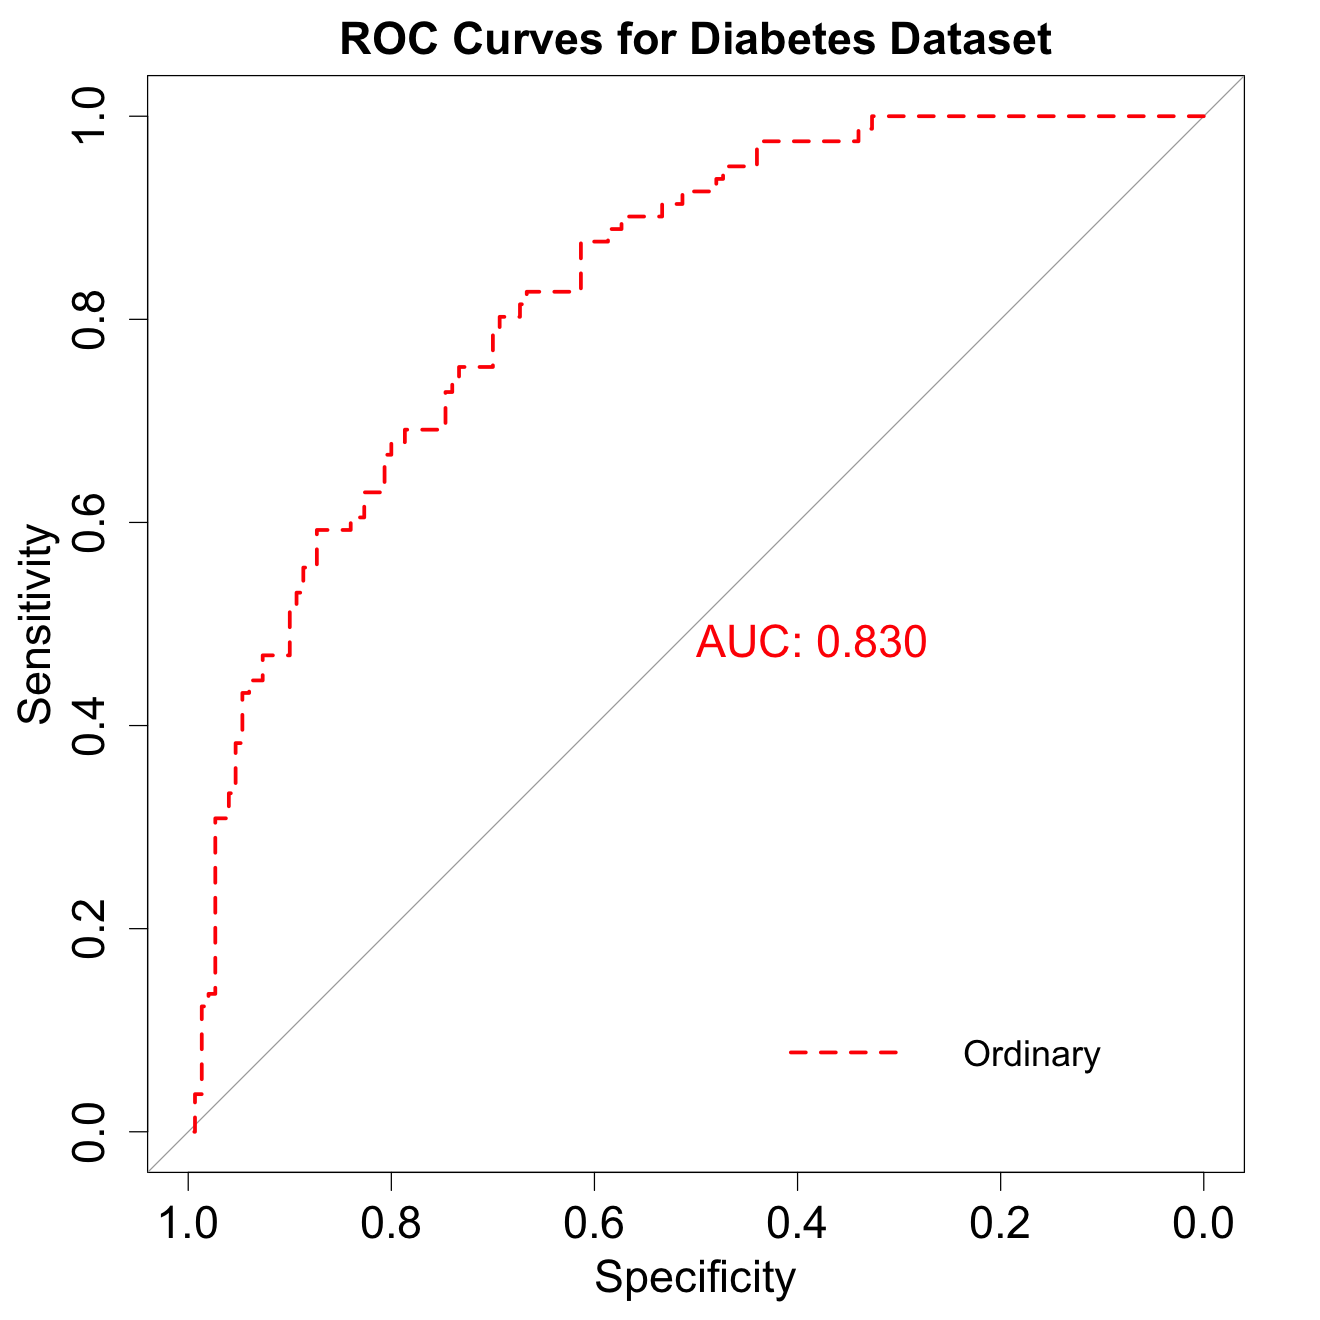

In [31]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_ordinary,
  print.auc = TRUE, col = "red", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", legend = "Ordinary",
       col = "red", 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

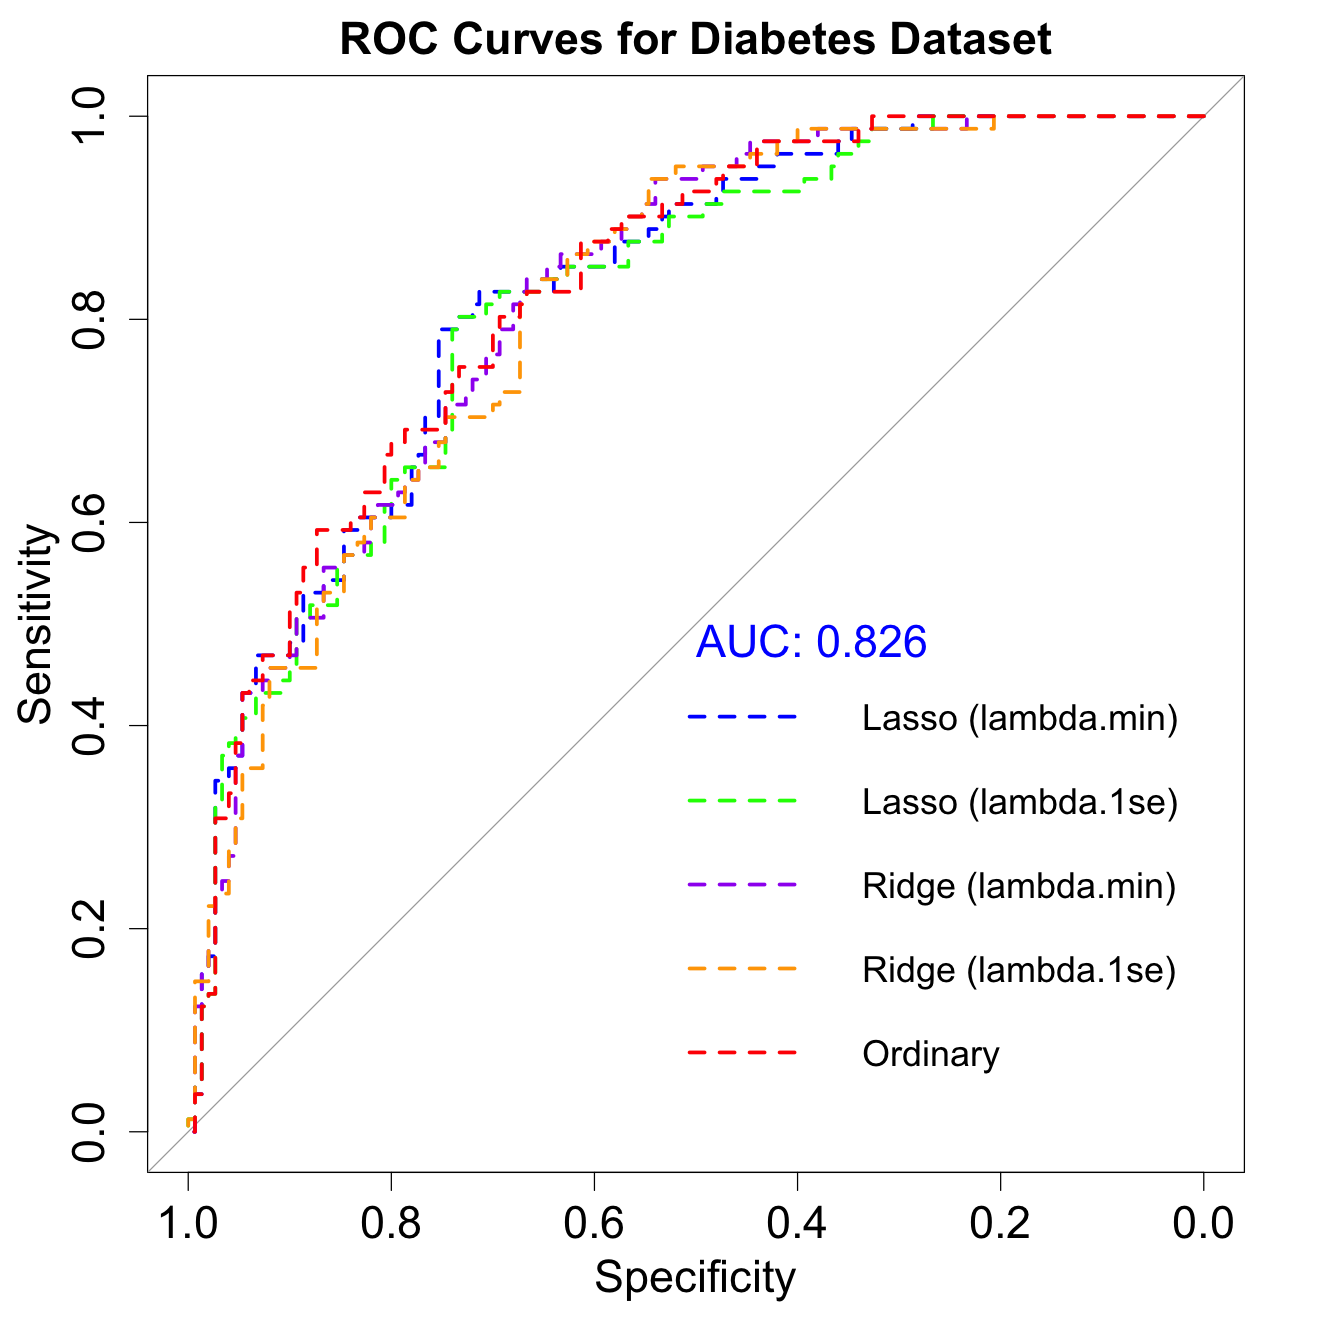

In [32]:
options(repr.plot.width = 11, repr.plot.height = 11) 
par(cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5)

plot(ROC_lasso_lambda_min,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset"
)

lines.roc(ROC_lasso_lambda_1se, col = "green", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ridge_lambda_min, col = "purple", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ridge_lambda_1se, col = "orange", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ordinary, col = "red", lwd = 3, lty = 2)

par(fig = c(0, 1, 0, 1), new = TRUE)
plot.new()
legend(x = "bottomright", inset = c(-0.2, 0), legend = c("Lasso (lambda.min)", "Lasso (lambda.1se)", 
                                                      "Ridge (lambda.min)", "Ridge (lambda.1se)", "Ordinary"),
       col = c("blue", "green", "purple", "orange", "red"), 
       lwd = 3, lty = 2, bty = "n", cex = 1.2, xpd = TRUE)

The `lasso_lambda_min` model is chosen for its balance between accuracy, simplicity, and robustness against overfitting. While its AUC (0.8455) is slightly lower than `ridge_lambda_min` (0.8487) in cross-validation, lasso performs well on the test set and inherently selects features by shrinking coefficients to zero. However, lasso's feature selection may exclude some influential variables, leading to a slightly lower performance compared to the `ordinary` model. Despite this potential issue, the model's reduced complexity and practical advantages outweigh the minor trade-off.